In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Neighborhood Data - Sheet1.csv to Neighborhood Data - Sheet1.csv
Saving new_york_listings_2024.csv to new_york_listings_2024.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
file_path = "new_york_listings_2024.csv"
df1 = pd.read_csv(file_path)
df1.head(1)

id                                        name  host_id host_name  \
0  1312228  Rental unit in Brooklyn · ★5.0 · 1 bedroom  7130382    Walter   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn  Clinton Hill  40.68371  -73.96461  Private room   55.0   

   ...  last_review  reviews_per_month calculated_host_listings_count  \
0  ...   2015-12-20               0.03                              1   

   availability_365  number_of_reviews_ltm     license  rating bedrooms beds  \
0                 0                      0  No License    5.0         1    1   

           baths  
0  Not specified  

[1 rows x 22 columns]

In [ ]:
file_path_2 = "Neighborhood Data - Sheet1.csv"
df2 = pd.read_csv(file_path_2)
df2.head(1)

Name  Walk Score  Transit Score  Bike Score Population
0  Little Italy         100            100          94      3,749

In [ ]:
# Left join two table
df = pd.merge(df1, df2, how='left', left_on='neighbourhood', right_on='Name')
df.head(1)

id                                        name  host_id host_name  \
0  1312228  Rental unit in Brooklyn · ★5.0 · 1 bedroom  7130382    Walter   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn  Clinton Hill  40.68371  -73.96461  Private room   55.0   

   ...     license  rating bedrooms  beds          baths          Name  \
0  ...  No License    5.0         1     1  Not specified  Clinton Hill   

   Walk Score Transit Score Bike Score Population  
0        97.0          99.0       95.0     25,887  

[1 rows x 27 columns]

# Data Overview

In [ ]:
# 1. Overview of the dataset
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review   

In [ ]:
# Convert Population into integer
df['Population'] = df['Population'].str.replace(',', '').astype(float).fillna(0).astype(int)

In [ ]:
# Convert the 'rating' column to numeric and handle non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(float)

In [ ]:
# 2. Check missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
rating                               0
bedrooms                             0
beds                                 0
baths                                0
Name                              3079
Walk Score                        3079
Transit Score                     3079
Bike Scor

In [ ]:
# 3. Statistical summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
                 id       host_id      latitude     longitude          price  \
count  2.075800e+04  2.075800e+04  20758.000000  20758.000000   20758.000000   
mean   3.034044e+17  1.749316e+08     40.726798    -73.939161     187.776616   
std    3.901216e+17  1.725541e+08      0.060294      0.061403    1022.797208   
min    2.595000e+03  1.678000e+03     40.500314    -74.249840      10.000000   
25%    2.708808e+07  2.041738e+07     40.684150    -73.980710      80.000000   
50%    4.993003e+07  1.087271e+08     40.722820    -73.949587     125.000000   
75%    7.216019e+17  3.144102e+08     40.763098    -73.917460     199.000000   
max    1.054376e+18  5.504035e+08     40.911147    -73.713650  100000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20758.000000       20758.000000       20758.000000   
mean        28.558435          42.642596           1.257910   
std         33.536518          73.561654           1.904661   
min   

# EDA-old

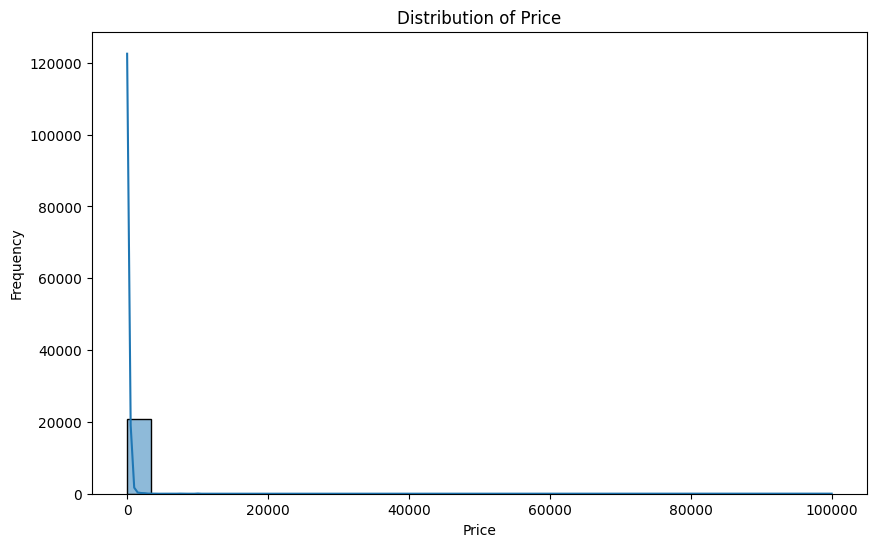

In [ ]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

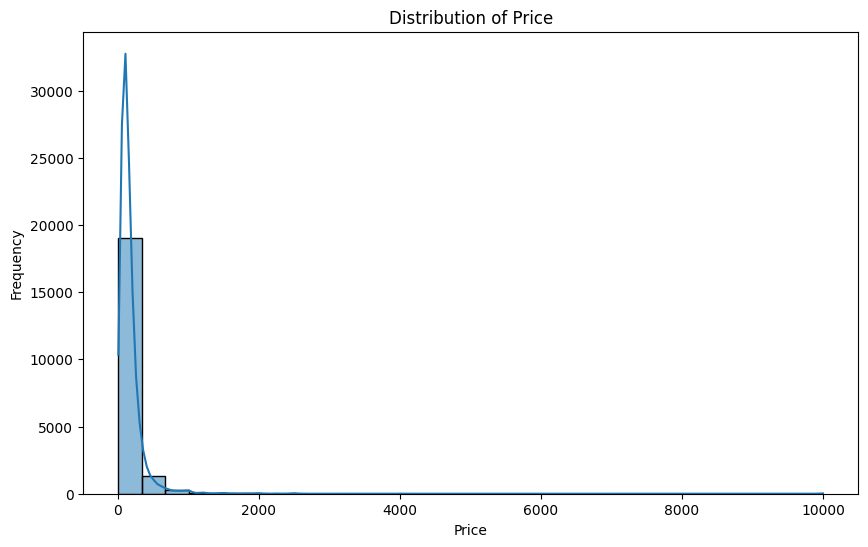

In [ ]:
# Distribution of Price less than 900000
df_less_than_900000 = df[df['price'] <= 90000]
plt.figure(figsize=(10, 6))
sns.histplot(df_less_than_900000['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

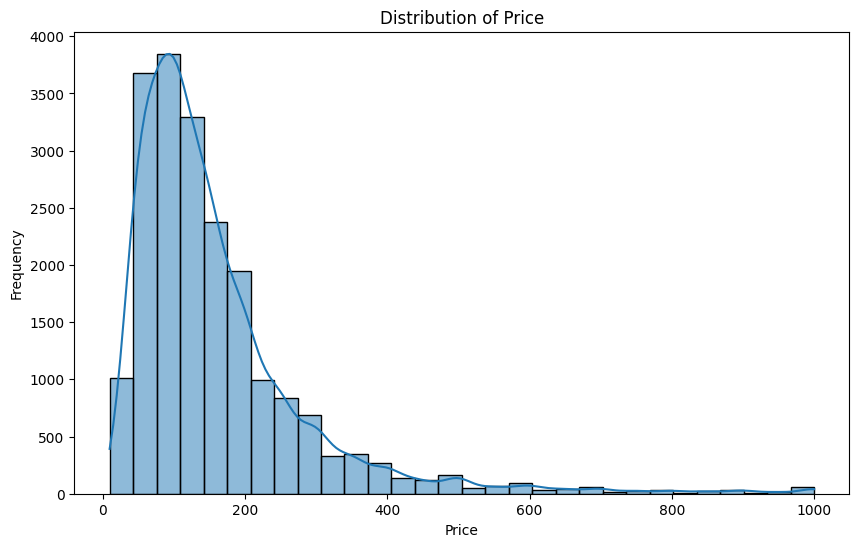

In [ ]:
# Distribution of Price less than 1000
df_less_than_1000 = df[df['price'] <= 1000]
plt.figure(figsize=(10, 6))
sns.histplot(df_less_than_1000['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Number of Listings by Room Type:
room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64


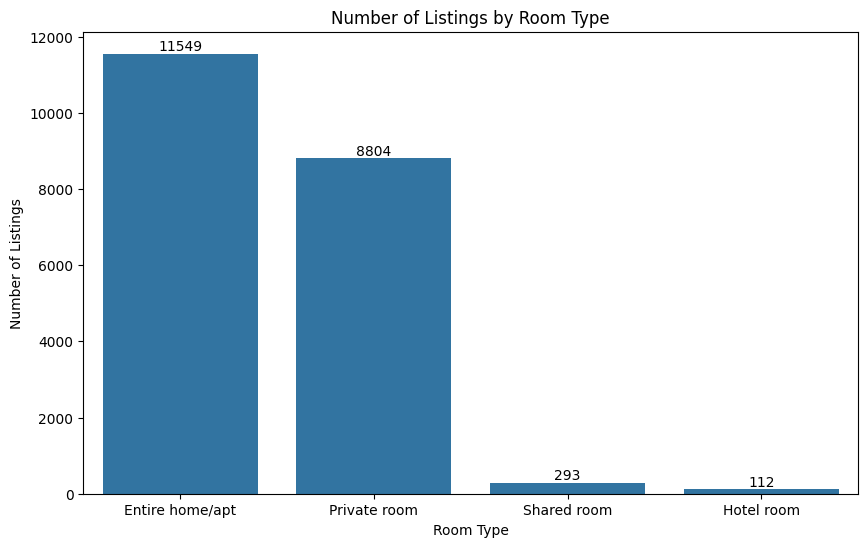

In [ ]:
# Number of Listings by Room Type
listings_by_room_type = df['room_type'].value_counts()
print("Number of Listings by Room Type:")
print(listings_by_room_type)

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=listings_by_room_type.index, y=listings_by_room_type.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

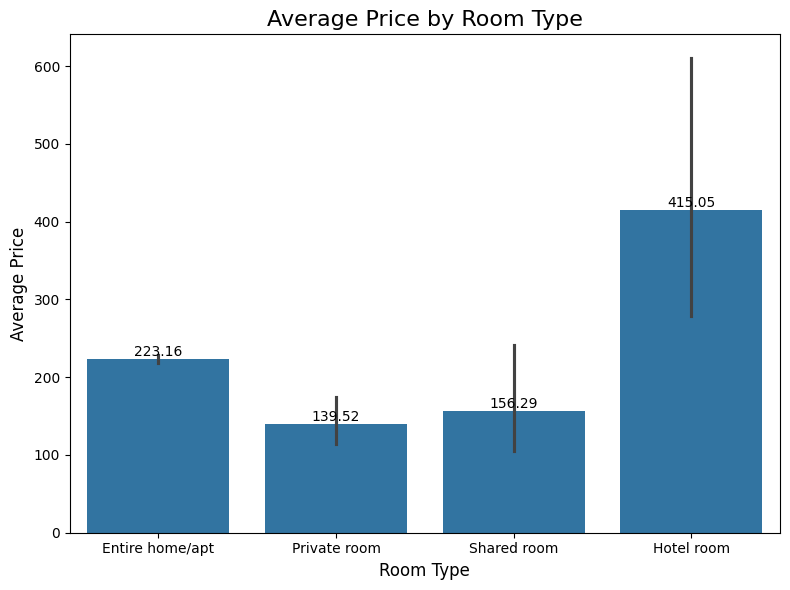

In [ ]:
# Avg price by room type
room_type_order = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='room_type', y='price', estimator=np.mean, order=room_type_order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.tight_layout()
plt.show()

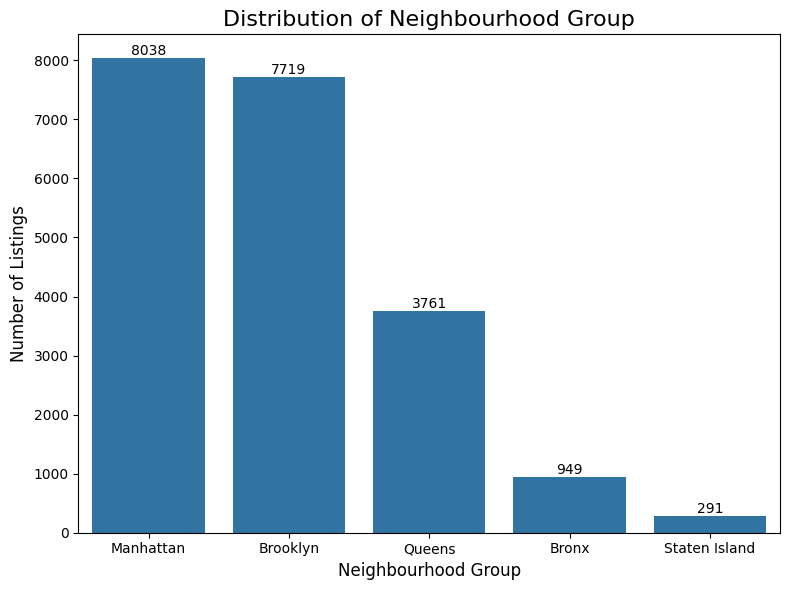

In [ ]:
# Count plot for Neighbourhood Group
neighborhood_order = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='neighbourhood_group', order=neighborhood_order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.tight_layout()
plt.show()

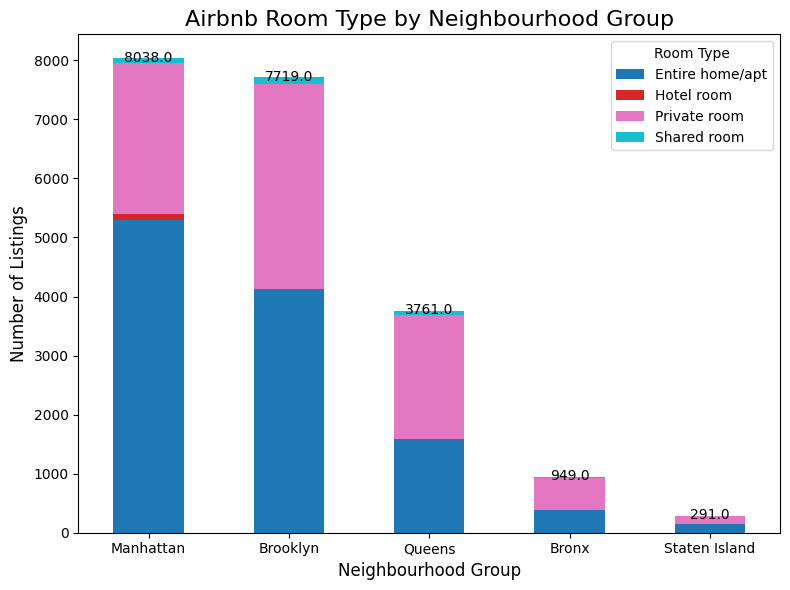

In [ ]:
# Group and count the number of listings by neighborhood and room type
neighborhood_order = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
room_type_counts = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()
room_type_counts = room_type_counts.reindex(neighborhood_order)
total_counts = room_type_counts.sum(axis=1)

ax = room_type_counts.plot(kind='bar', stacked=True, figsize=(8, 6), cmap='tab10')

for idx, total in enumerate(total_counts):
    ax.text(idx, total + 5, str(total), ha='center', va='center', fontsize=10)

plt.title("Airbnb Room Type by Neighbourhood Group", fontsize=16)
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.legend(title="Room Type", fontsize=10)
plt.xticks(rotation=360, fontsize=10)
plt.tight_layout()
plt.show()

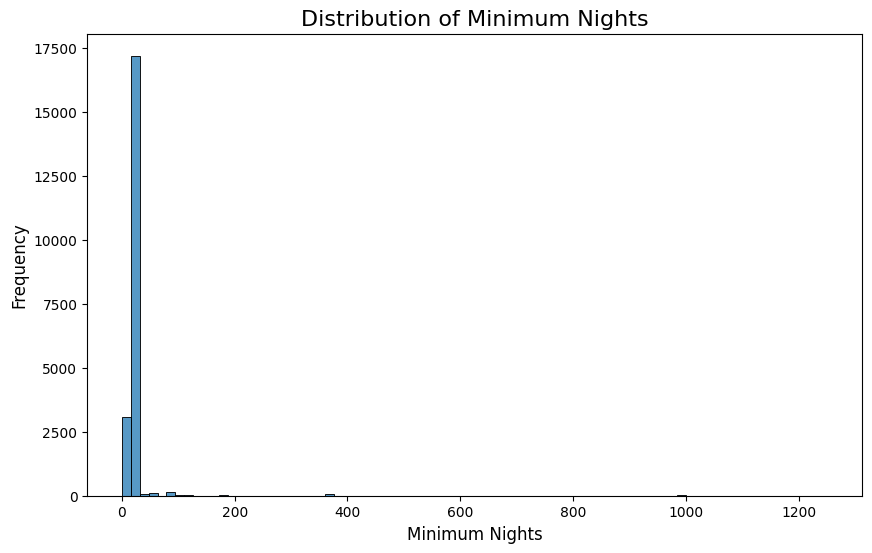

In [ ]:
# Plot the histogram for the distribution of minimum_nights
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=80, kde=False)
plt.title("Distribution of Minimum Nights", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

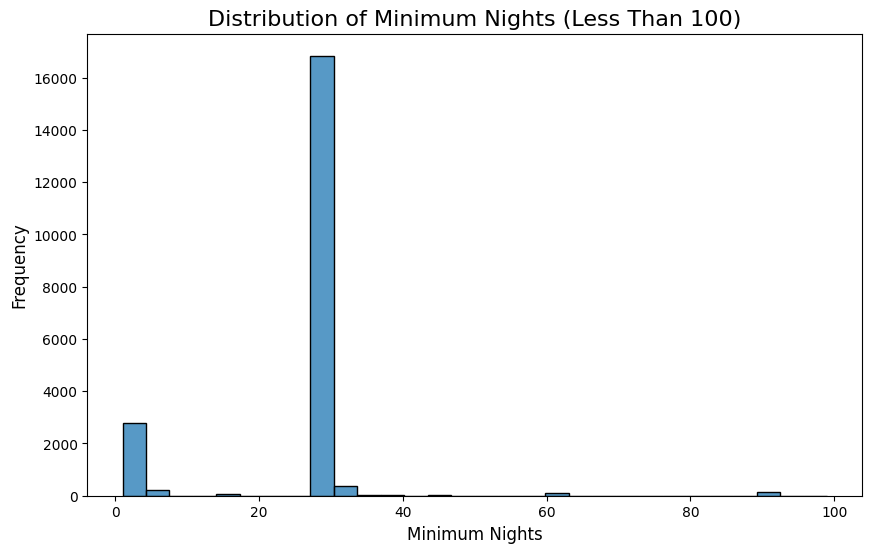

In [ ]:
# Filter data for minimum_nights < 100
filtered_data = df[df['minimum_nights'] < 100]

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['minimum_nights'], bins=30, kde=False)
plt.title("Distribution of Minimum Nights (Less Than 100)", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

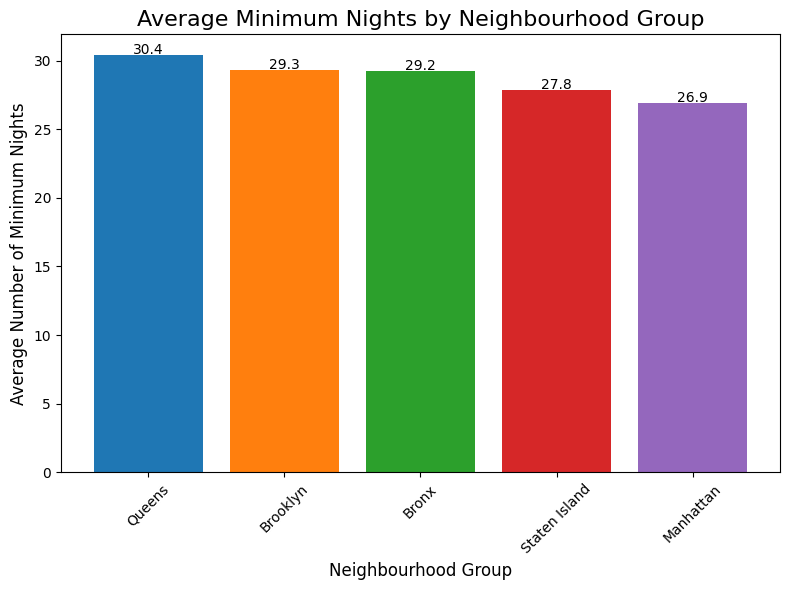

In [ ]:
# Plot Minimum Nights by Borough
avg_min_nights_borough = df.groupby('neighbourhood_group')['minimum_nights'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
colors = sns.color_palette('tab10', len(avg_min_nights_borough))
bars = plt.bar(avg_min_nights_borough.index, avg_min_nights_borough.values, color=colors)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f"{bar.get_height():.1f}", ha='center', fontsize=10)

plt.title("Average Minimum Nights by Neighbourhood Group", fontsize=16)
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Average Number of Minimum Nights", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

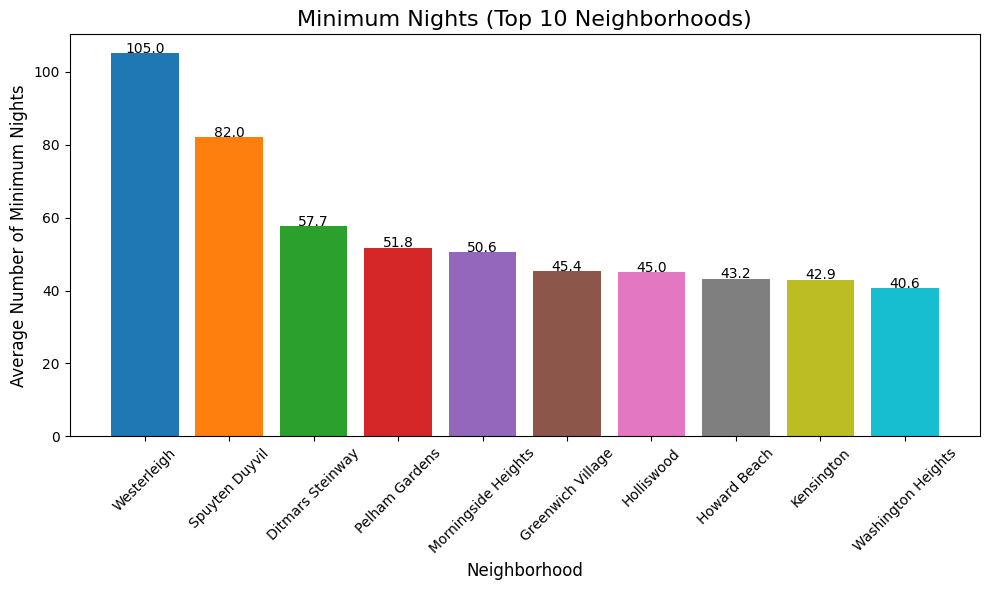

In [ ]:
# Plot average minimum nights for top 10 neighborhoods
avg_min_nights_neighborhood = df.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('tab10', len(avg_min_nights_neighborhood))
bars = plt.bar(avg_min_nights_neighborhood.index, avg_min_nights_neighborhood.values, color=colors)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f"{bar.get_height():.1f}", ha='center', fontsize=10)

plt.title("Minimum Nights (Top 10 Neighborhoods)", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Number of Minimum Nights", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

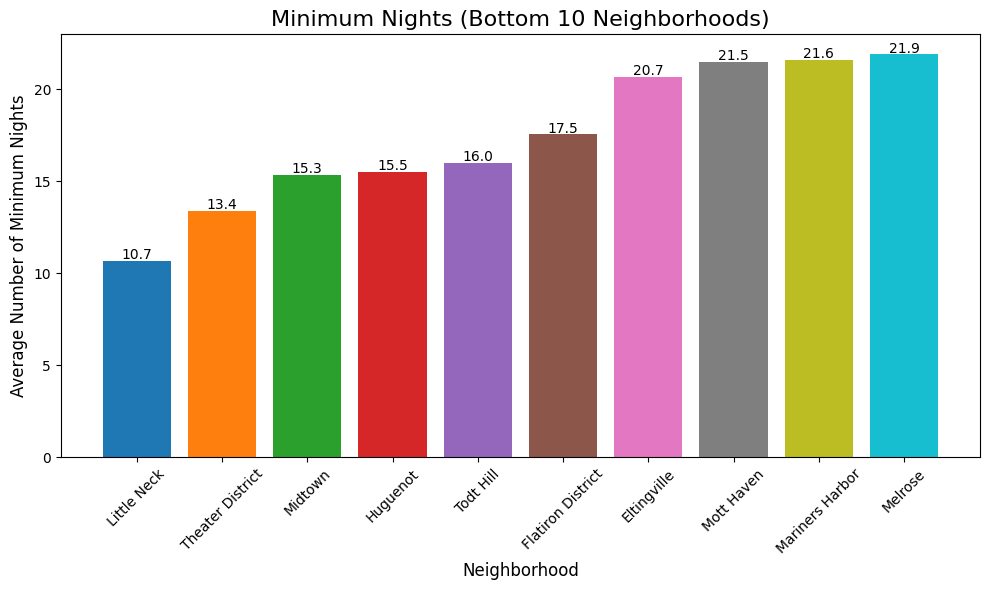

In [ ]:
# Plot the average minimum nights for bottom 10 neighborhoods
avg_min_nights_worst_neighborhoods = df.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('tab10', len(avg_min_nights_worst_neighborhoods))
bars = plt.bar(avg_min_nights_worst_neighborhoods.index, avg_min_nights_worst_neighborhoods.values, color=colors)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f"{bar.get_height():.1f}", ha='center', fontsize=10)

plt.title("Minimum Nights (Bottom 10 Neighborhoods)", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Number of Minimum Nights", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

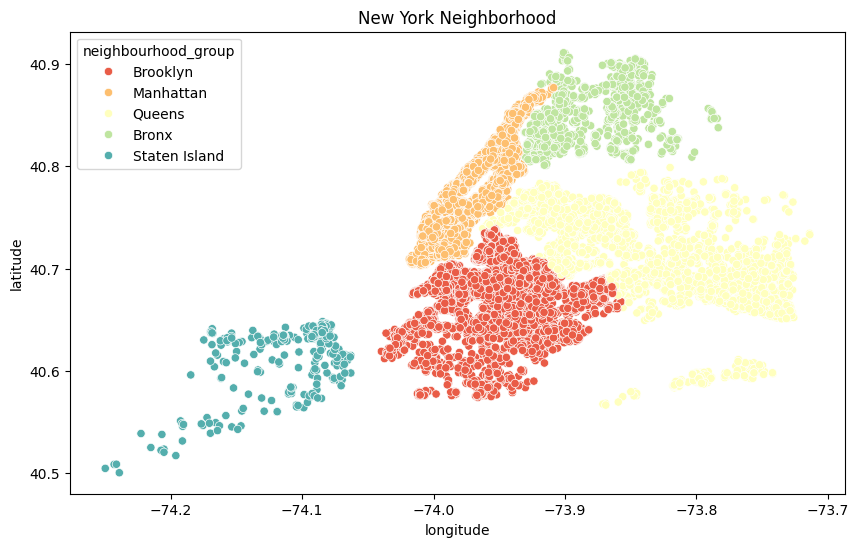

In [ ]:
# Represent the neighborhood on map
f,ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(y=df.latitude, x=df.longitude, hue=df.neighbourhood_group, palette='Spectral')

plt.title('New York Neighborhood')
plt.show()

Average Price by Neighborhood Group:
neighbourhood_group
Bronx            118.407798
Brooklyn         187.033942
Manhattan        227.854193
Queens           126.489232
Staten Island    118.780069
Name: price, dtype: float64


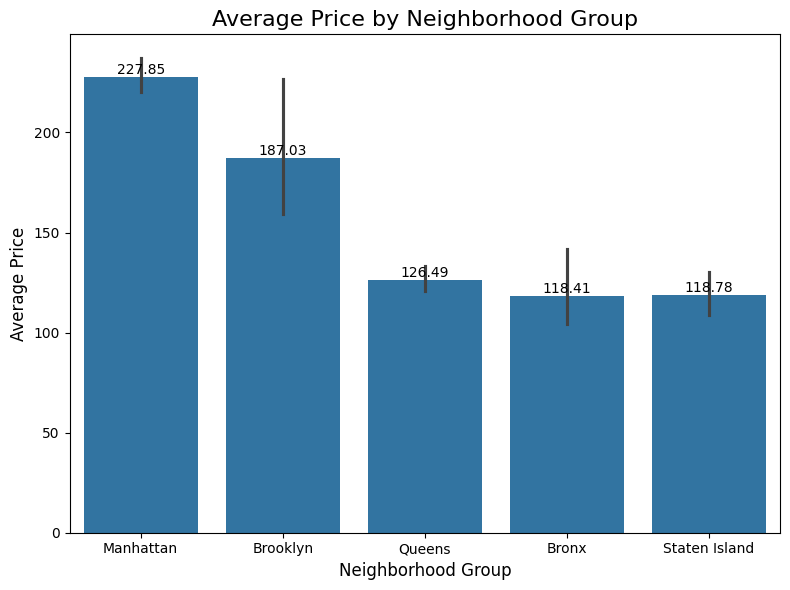

In [ ]:
# Plot the average price for each neighborhood group
neighborhood_order = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
mean_price_by_neighborhood_group = df.groupby('neighbourhood_group')['price'].mean()
print("Average Price by Neighborhood Group:")
print(mean_price_by_neighborhood_group)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean, order=neighborhood_order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Average Price by Neighborhood Group', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.tight_layout()
plt.show()

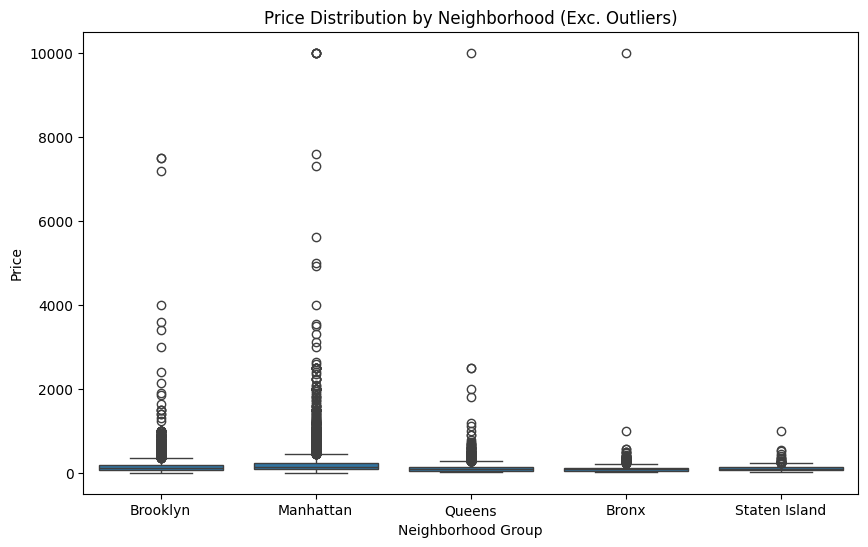

In [ ]:
# Plot price distribution by neighbourhood with outliers
df_filtered = df[df['price'] <= 90000]

plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_filtered)
plt.title('Price Distribution by Neighborhood (Exc. Outliers)')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.show()

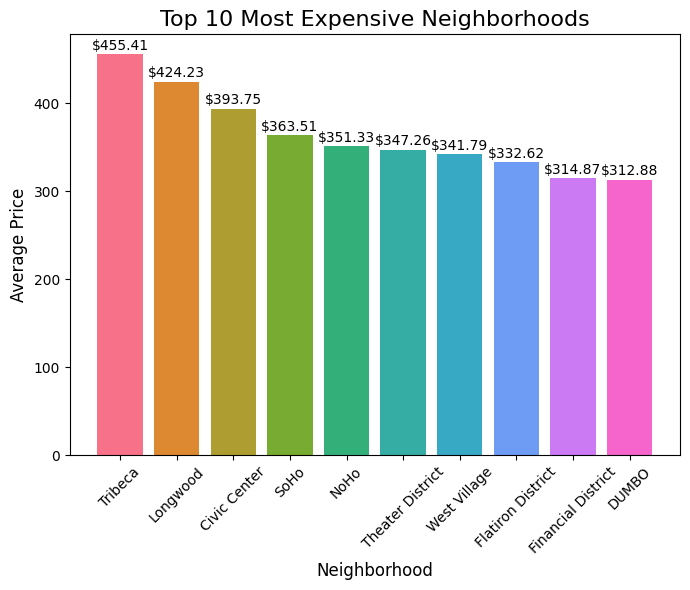

In [ ]:
# Plot Most Expensive Neighborhoods
neighborhood_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

top_expensive = neighborhood_prices.head(10)
plt.figure(figsize=(7, 6))
colors = sns.color_palette('husl', len(top_expensive))
bars = plt.bar(top_expensive.index, top_expensive.values, color=colors)
plt.title("Top 10 Most Expensive Neighborhoods", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f"${bar.get_height():.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

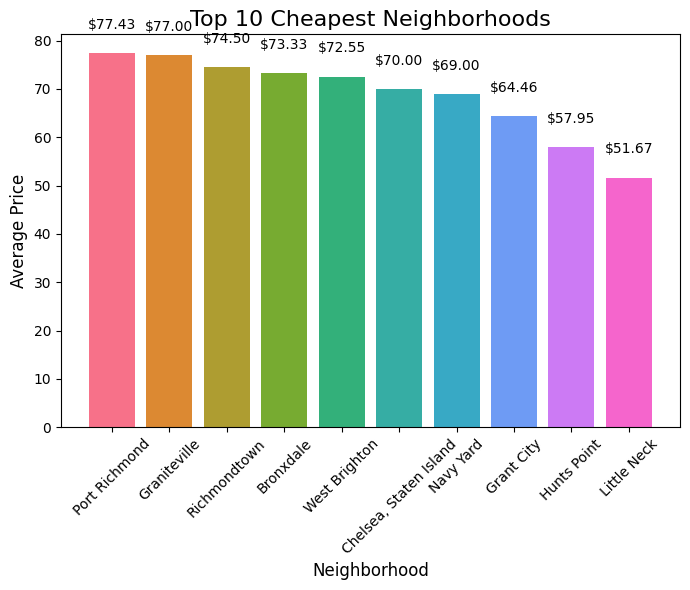

In [ ]:
# Plot Cheapest Neighborhoods
bottom_cheap = neighborhood_prices.tail(10)
plt.figure(figsize=(7, 6))
colors = sns.color_palette('husl', len(bottom_cheap))  # Different colors for each bar
bars = plt.bar(bottom_cheap.index, bottom_cheap.values, color=colors)
plt.title("Top 10 Cheapest Neighborhoods", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f"${bar.get_height():.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

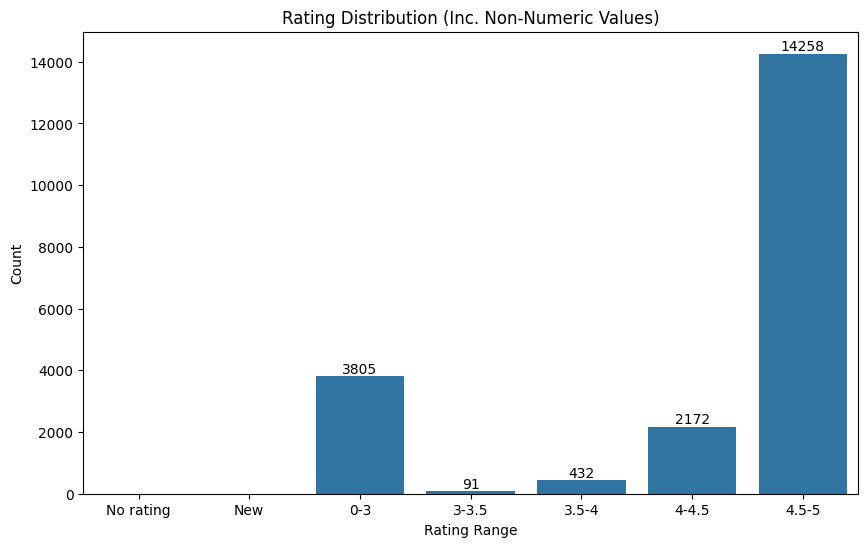

In [ ]:
# Rating distribution
numeric_ratings = pd.to_numeric(df['rating'], errors='coerce')
non_numeric_mask = df['rating'].isin(['New ', 'No rating'])

bins = [0, 3, 3.5, 4, 4.5, 5]
labels = ['0-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

df['rating_range'] = pd.cut(numeric_ratings, bins=bins, labels=labels, include_lowest=True)
df['rating_range'] = df['rating_range'].cat.add_categories(['New ', 'No rating'])
df.loc[non_numeric_mask, 'rating_range'] = df.loc[non_numeric_mask, 'rating']

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='rating_range', order=['No rating', 'New'] + labels)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Rating Distribution (Inc. Non-Numeric Values)')
plt.xlabel('Rating Range')
plt.ylabel('Count')
plt.show()

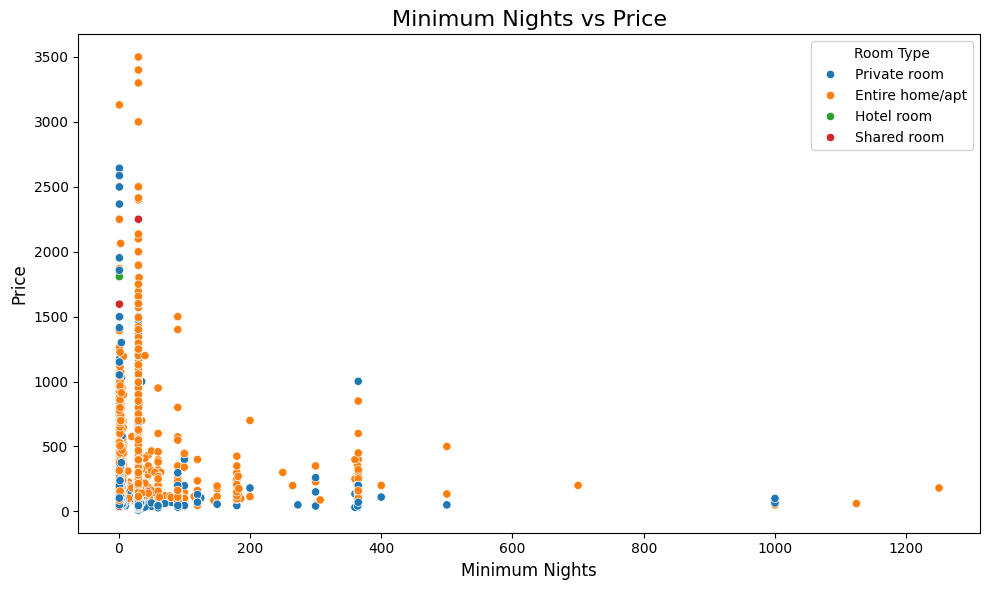

In [ ]:
# Price vs Minimum nights
df_night = df[df['price'] <= 3500].copy() # Get rid of price outliers

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_night, x='minimum_nights', y='price', hue='room_type')
plt.title('Minimum Nights vs Price', fontsize=16)
plt.xlabel('Minimum Nights', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Room Type', fontsize=10)
plt.tight_layout()
plt.show()

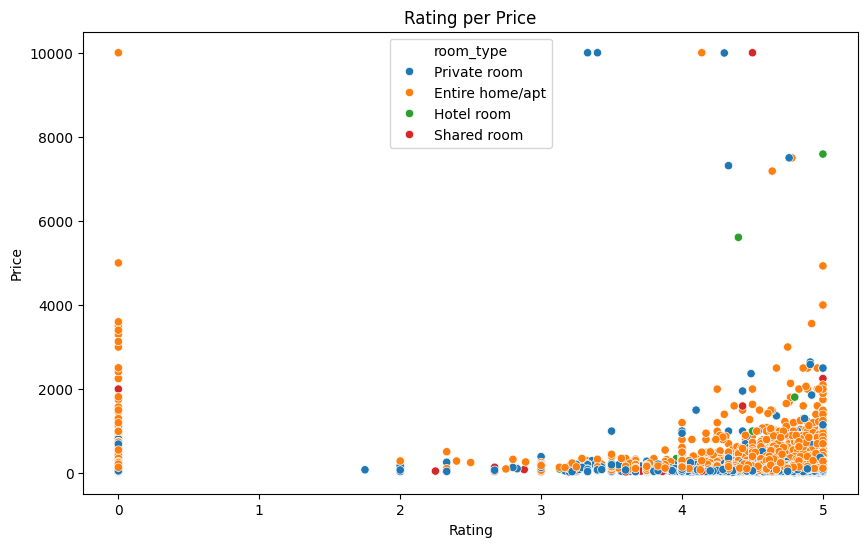

In [ ]:
# Rating per Price
df_ratings = df[df['price'] <= 90000].copy() # Get rid of price outliers
df_ratings['rating'] = pd.to_numeric(df_ratings['rating'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_ratings, x='rating', y='price', hue='room_type')
plt.title('Rating per Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

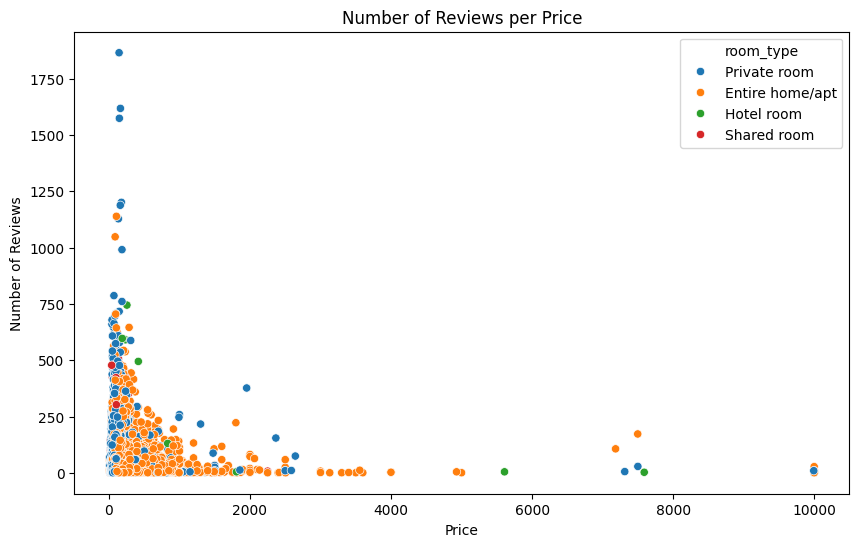

In [ ]:
# Number of Reviews per Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_ratings, x='price', y='number_of_reviews', hue='room_type')
plt.title('Number of Reviews per Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

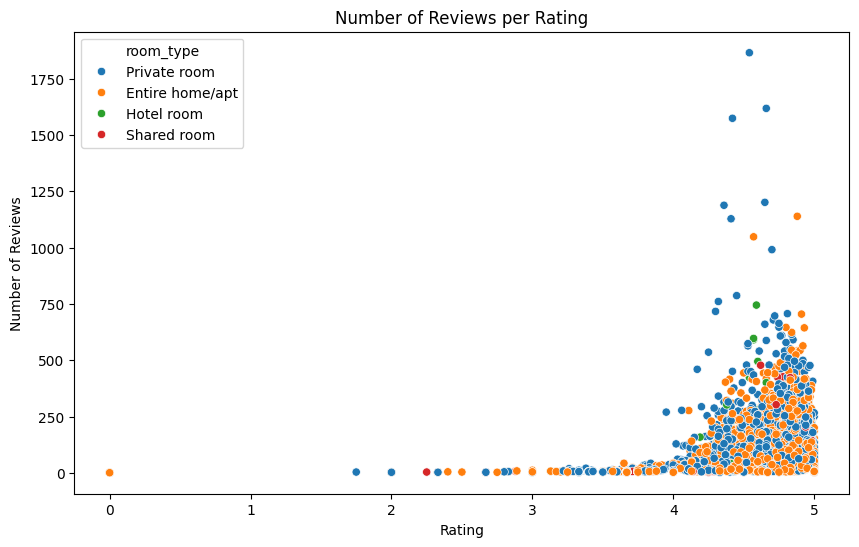

In [ ]:
# Number of Reviews per Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_ratings, x='rating', y='number_of_reviews', hue='room_type')
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Avg reviews for each neighbourhood
reviews_per_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index(name='count')
avg_reviews_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index(name='avg reviews/apartment')
reviews_per_neighbourhood = reviews_per_neighbourhood.merge(avg_reviews_neighbourhood,on='neighbourhood').sort_values('count',ascending=False).head(10)
reviews_per_neighbourhood

neighbourhood  count  avg reviews/apartment
13   Bedford-Stuyvesant  90150              56.841110
95               Harlem  54589              51.353716
214        Williamsburg  43141              44.521156
52        Crown Heights  32367              48.745482
28             Bushwick  29375              39.114514
128             Midtown  28402              30.150743
96       Hell's Kitchen  28171              32.492503
65         East Village  20626              49.941889
62          East Harlem  18977              50.605333
4               Astoria  18725              51.869806

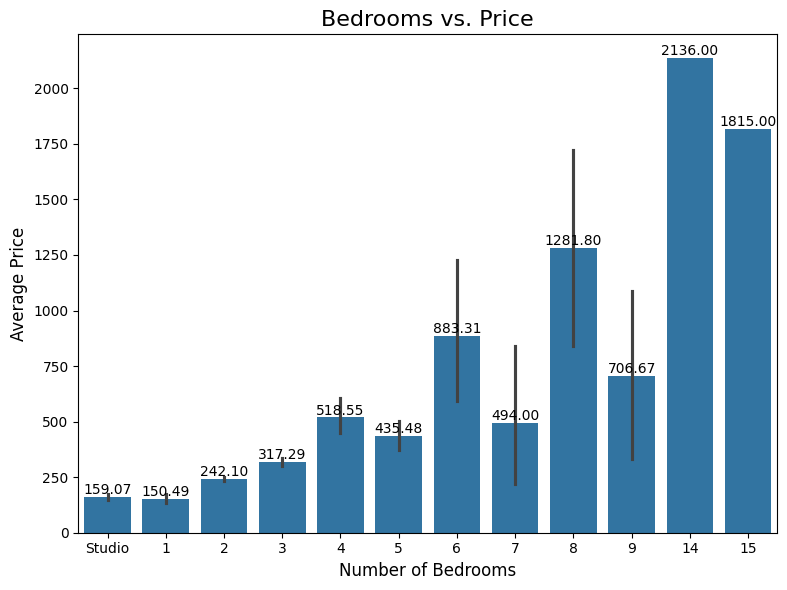

In [ ]:
# Price vs Bedrooms
bedroom_order = ['Studio', '1', '2', '3', '4', '5', '6', '7', '8', '9', '14', '15']
df['bedrooms'] = df['bedrooms'].astype(str)  # Convert to string for consistency

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='bedrooms', y='price', estimator=np.mean, order=bedroom_order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Bedrooms vs. Price', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.tight_layout()
plt.show()

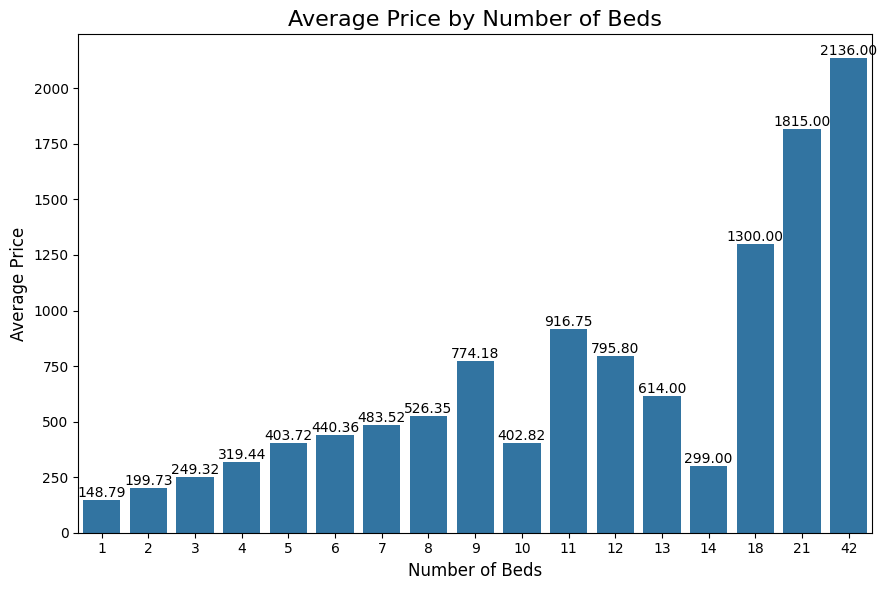

In [ ]:
# Price vs Beds
avg_price_by_beds = df.groupby('beds')['price'].mean().reset_index()
plt.figure(figsize=(9, 6))
sns.barplot(data=avg_price_by_beds, x='beds', y='price', order=sorted(df['beds'].unique()))

for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Average Price by Number of Beds', fontsize=16)
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

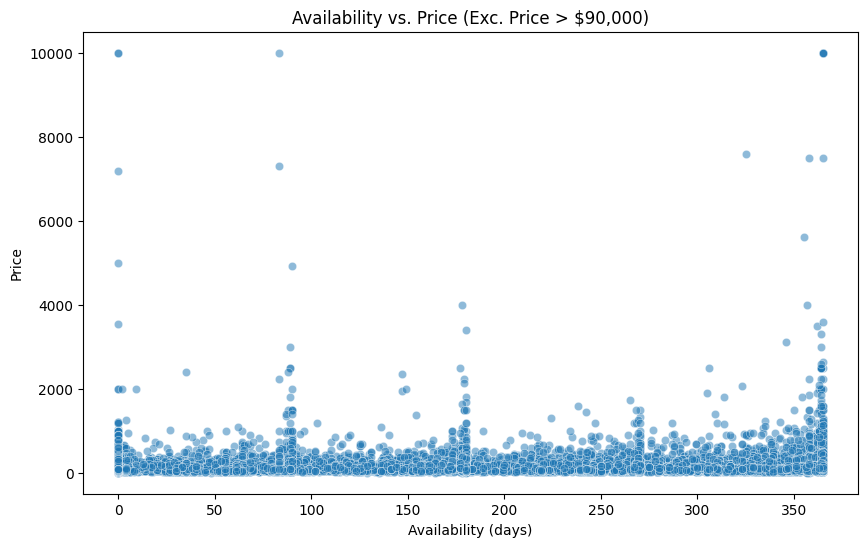

In [ ]:
# Scatter plot for Availability vs. Price after excluding outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='availability_365', y='price', alpha=0.5)
plt.title('Availability vs. Price (Exc. Price > $90,000)')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()

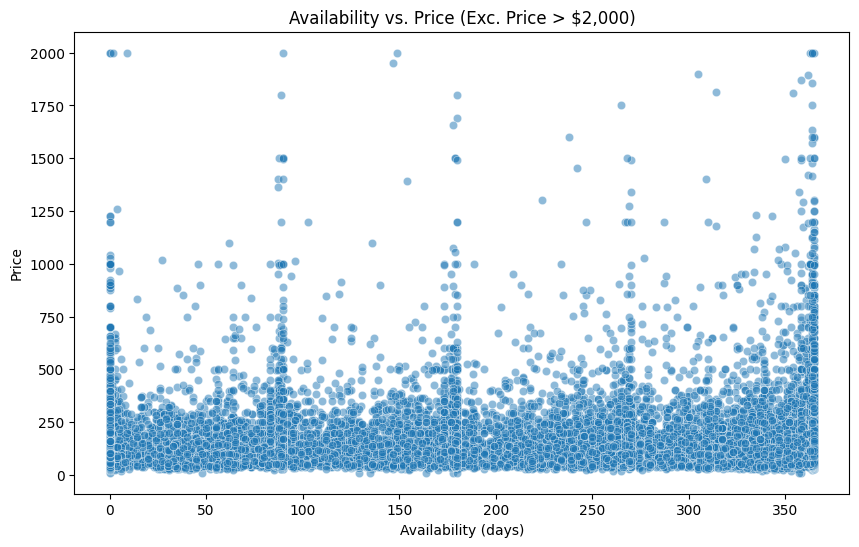

In [ ]:
# Price vs Availability
df_filtered_2 = df[df['price'] <= 2000]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_2, x='availability_365', y='price', alpha=0.5)
plt.title('Availability vs. Price (Exc. Price > $2,000)')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()

In [ ]:
# Host id distribution
df.groupby('host_id')['host_id'].value_counts().reset_index(name='count').sort_values('count',ascending=False).head(10)

host_id  count
7695  162280872    146
5359   51501835    129
5665   61391963    113
6739  107434423    107
3528   19303369     87
7279  137358866     81
8426  219517861     81
8191  200239515     70
6959  120762452     69
8237  204704622     62

In [ ]:
# Top 1 host id
host_id_162280872 = df[df['host_id'] == 162280872].groupby(['neighbourhood_group','neighbourhood'])['name'].count().reset_index(name='count')
price_162280872 = df[df['host_id'] == 162280872].groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index(name='avg price')
host_id_162280872 = host_id_162280872.merge(price_162280872,on='neighbourhood').sort_values('count',ascending=False)
host_id_162280872[['neighbourhood_group_x','neighbourhood','count','avg price']]

neighbourhood_group_x      neighbourhood  count   avg price
11             Manhattan    Upper East Side     64  154.265625
7              Manhattan     Hell's Kitchen     24  160.416667
8              Manhattan           Kips Bay     19  126.052632
9              Manhattan    Lower East Side     11  126.818182
3              Manhattan       East Village     10  173.600000
0               Brooklyn         Greenpoint      6  189.666667
6              Manhattan  Greenwich Village      4  261.250000
1               Brooklyn        South Slope      2  174.500000
4              Manhattan  Flatiron District      2  137.500000
2               Brooklyn       Williamsburg      1  171.000000
5              Manhattan           Gramercy      1  160.000000
10             Manhattan            Midtown      1  158.000000
12             Manhattan    Upper West Side      1  123.000000

In [ ]:
# Top 2 host id
host_id_51501835 = df[df['host_id'] == 51501835].groupby(['neighbourhood_group','neighbourhood'])['name'].count().reset_index(name='count')
price_51501835 = df[df['host_id'] == 51501835].groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index(name='avg price')
host_id_51501835 = host_id_51501835.merge(price_51501835,on='neighbourhood').sort_values('count',ascending=False)
host_id_51501835[['neighbourhood_group_x','neighbourhood','count','avg price']]

neighbourhood_group_x    neighbourhood  count   avg price
1             Manhattan   Hell's Kitchen     75  132.333333
2             Manhattan     Little Italy     23  124.391304
5             Manhattan  Upper East Side     20  107.500000
0             Manhattan        Chinatown      6  100.000000
3             Manhattan  Lower East Side      4  130.250000
4             Manhattan           Nolita      1  120.000000

<Figure size 1200x600 with 0 Axes>

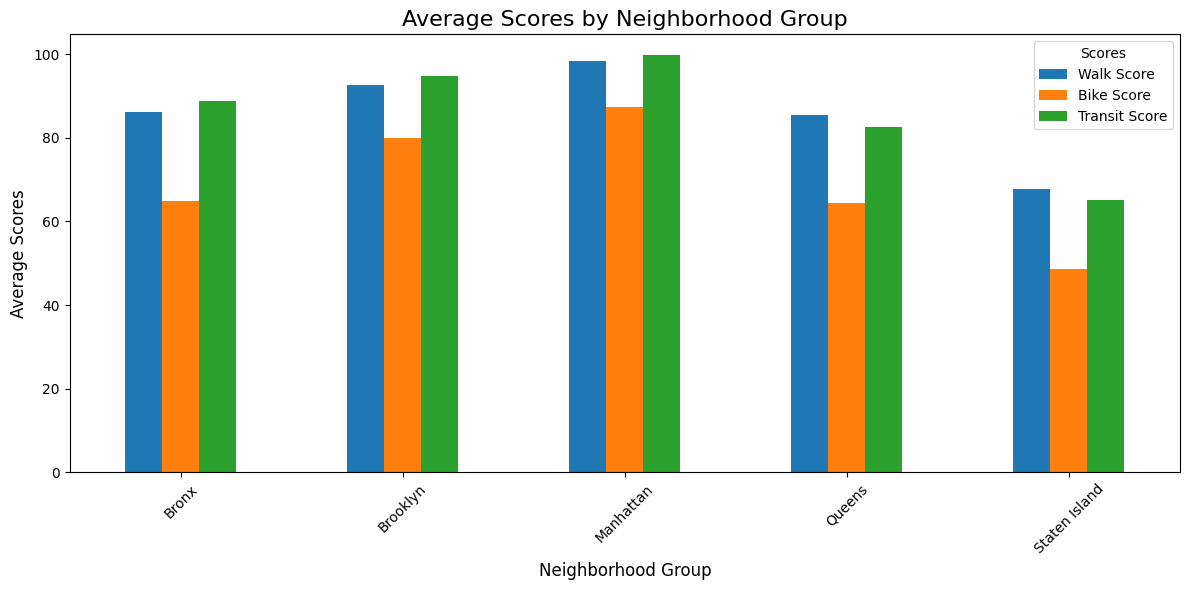

In [ ]:
# Walk Score, Bike Score, and Transit Score by Neighborhood Group
plt.figure(figsize=(12, 6))
scores_by_group = df.groupby('neighbourhood_group')[['Walk Score', 'Bike Score', 'Transit Score']].mean()
scores_by_group.plot(kind='bar', figsize=(12, 6))
plt.title("Average Scores by Neighborhood Group", fontsize=16)
plt.xlabel("Neighborhood Group", fontsize=12)
plt.ylabel("Average Scores", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Scores")
plt.tight_layout()
plt.show()

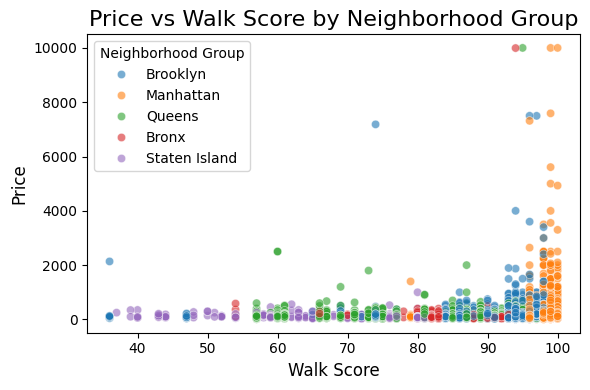

In [ ]:
# Price vs Walk, Bike, and Transit Scores
df_filtered = df[df['price'] <= 90000]
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_filtered, x='Walk Score', y='price', hue='neighbourhood_group', alpha=0.6, palette='tab10')
plt.title("Price vs Walk Score by Neighborhood Group", fontsize=16)
plt.xlabel("Walk Score", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title="Neighborhood Group")
plt.tight_layout()
plt.show()

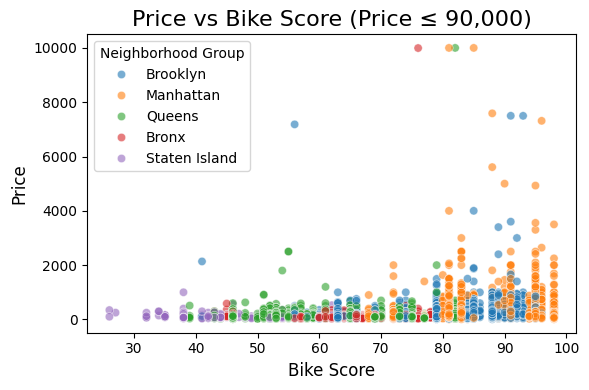

In [ ]:
# Price vs Bike Score by Neighborhood Group
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_filtered, x='Bike Score', y='price', hue='neighbourhood_group', alpha=0.6, palette='tab10')
plt.title("Price vs Bike Score (Price ≤ 90,000)", fontsize=16)
plt.xlabel("Bike Score", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title="Neighborhood Group")
plt.tight_layout()
plt.show()

Mean Population by Neighborhood:
neighbourhood
Upper West Side               208776.0
Upper East Side               208013.0
Flushing                      172447.0
Flatbush                      167618.0
Washington Heights            158951.0
                                ...   
Bay Terrace, Staten Island         0.0
South Slope                        0.0
Nolita                             0.0
Gramercy                           0.0
Morningside Heights                0.0
Name: Population, Length: 221, dtype: float64


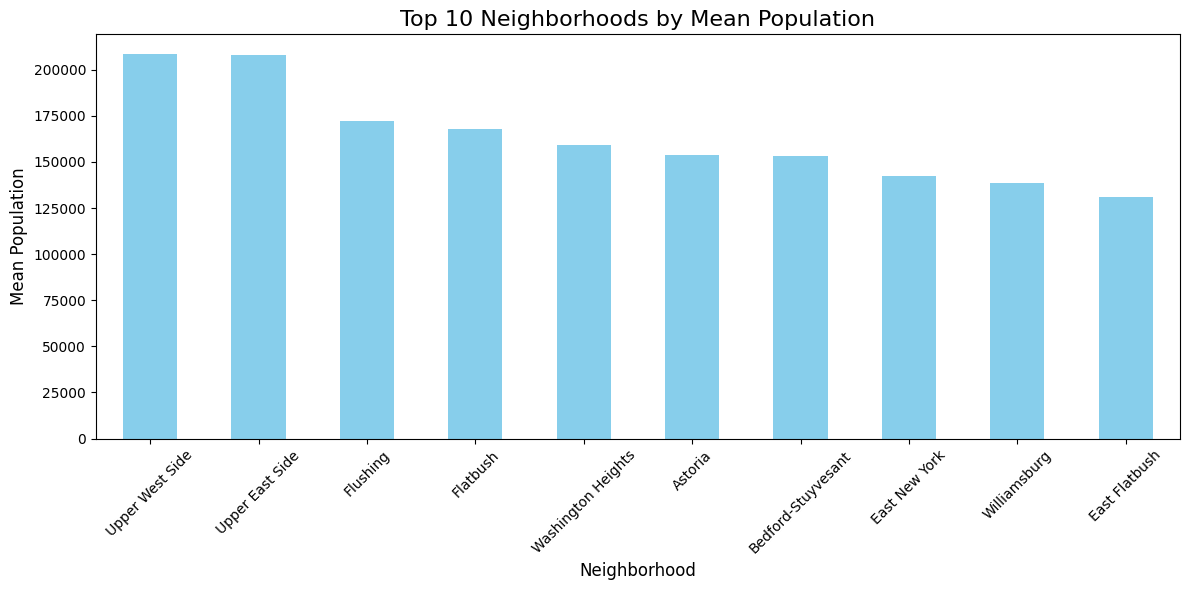

In [ ]:
# top 10 neighbourhood vs population
population_by_neighborhood = df.groupby('neighbourhood')['Population'].mean().sort_values(ascending=False)
print("Mean Population by Neighborhood:")
print(population_by_neighborhood)

plt.figure(figsize=(12, 6))
population_by_neighborhood.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Neighborhoods by Mean Population", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Mean Population", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

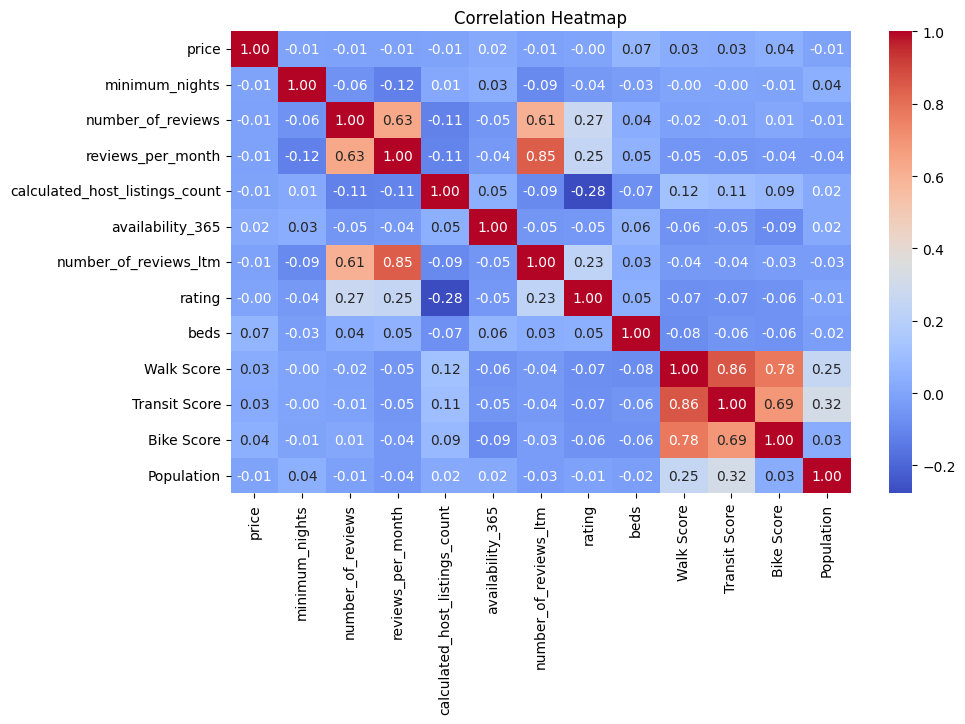

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.drop(['id','host_id', 'latitude', 'longitude'], axis = 1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is no strong correlation except `number of reviews last month` and `reviews per month`.

*   Correlation > 0.8: `number of reviews last month` vs. `reviews per month`
*   Correlation > 0.6 and <= 0.8: `number of reviews` vs. `eviews per month` and `number of reviews last month` vs. `number of reviews`



# EDA

## Price

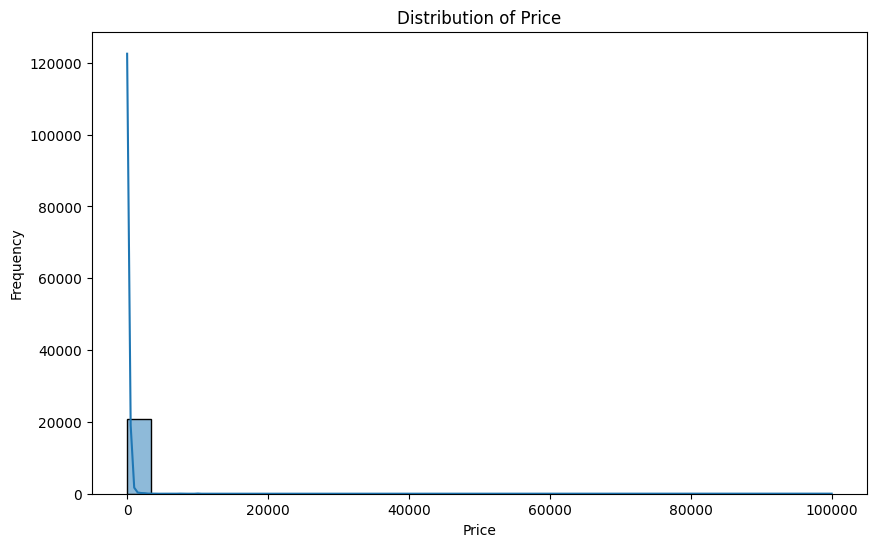

In [ ]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Distribution of Price less than 2000
df_less_than_2000 = df[df['price'] <= 2000]
plt.figure(figsize=(10, 6))
sns.histplot(df_less_than_2000['price'], kde=True, bins=30)
plt.title('Distribution of Price (<$2,000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Number of Room Listings

Number of Listings by Room Type:
room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64


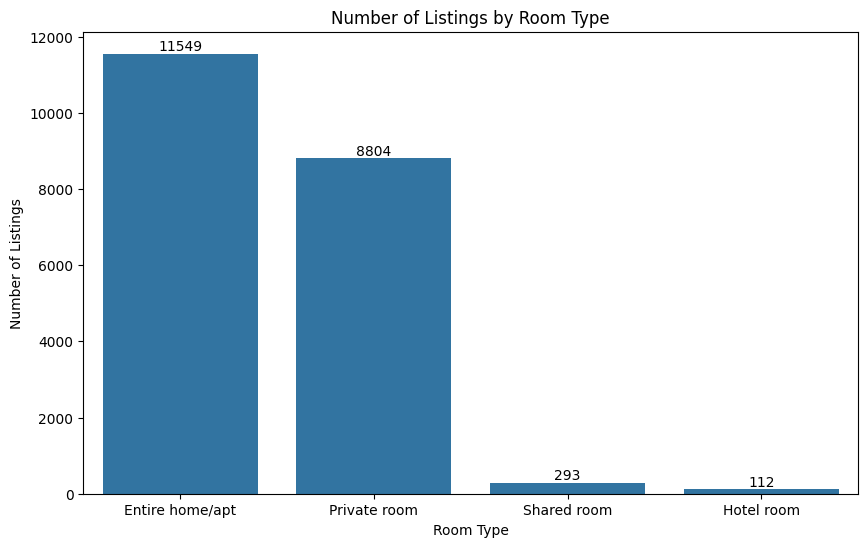

In [ ]:
# Calculate the number of listings for each room type
listings_by_room_type = df['room_type'].value_counts()

# Display the results
print("Number of Listings by Room Type:")
print(listings_by_room_type)

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=listings_by_room_type.index, y=listings_by_room_type.values)

# Add the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot titles and labels
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

# Display the plot
plt.show()

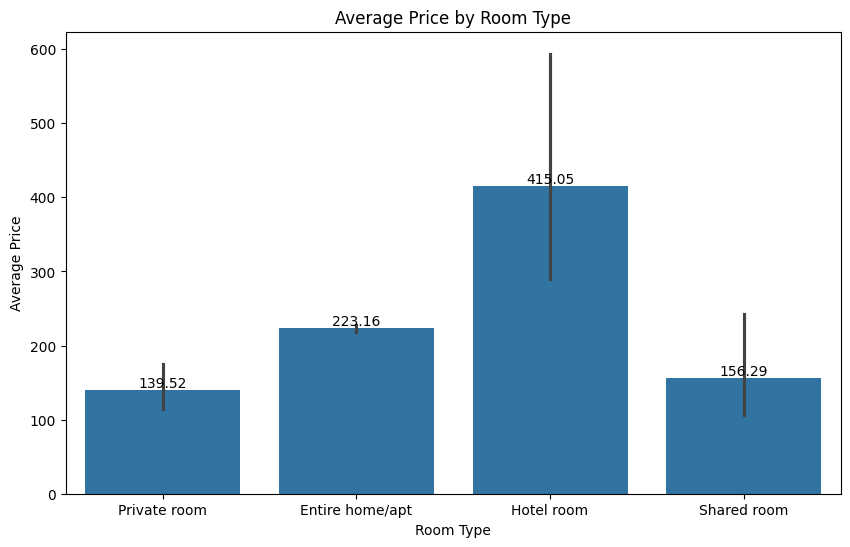

In [ ]:
# Average price by room type
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='room_type', y='price', estimator=np.mean)

# Add numeric labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set titles and labels
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

# Show the plot
plt.show()

## Breakdown by Neighborhood

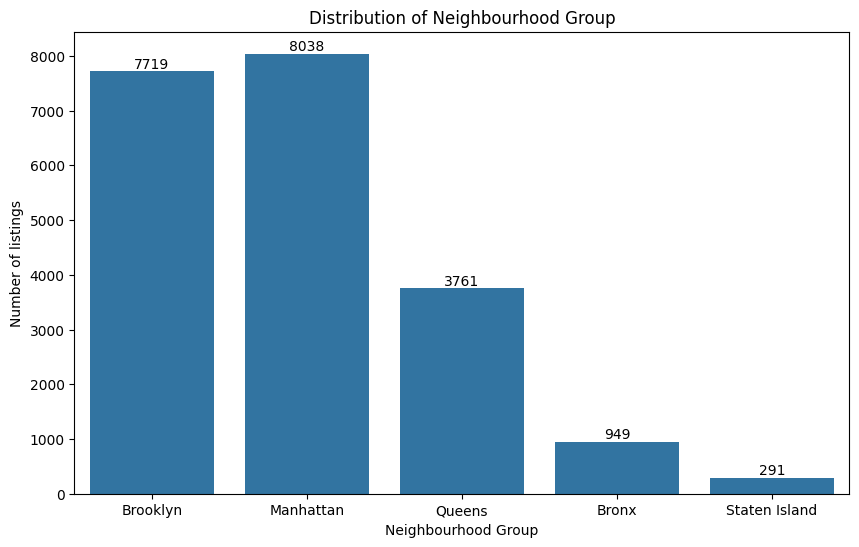

In [ ]:
# Count plot for Neighbourhood Group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='neighbourhood_group')

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot titles and labels
plt.title('Distribution of Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of listings')

# Represent the neighborhood on map# Display the plot
plt.show()

The listings mainly consist of entire apartments and single rooms.

<Figure size 1000x600 with 0 Axes>

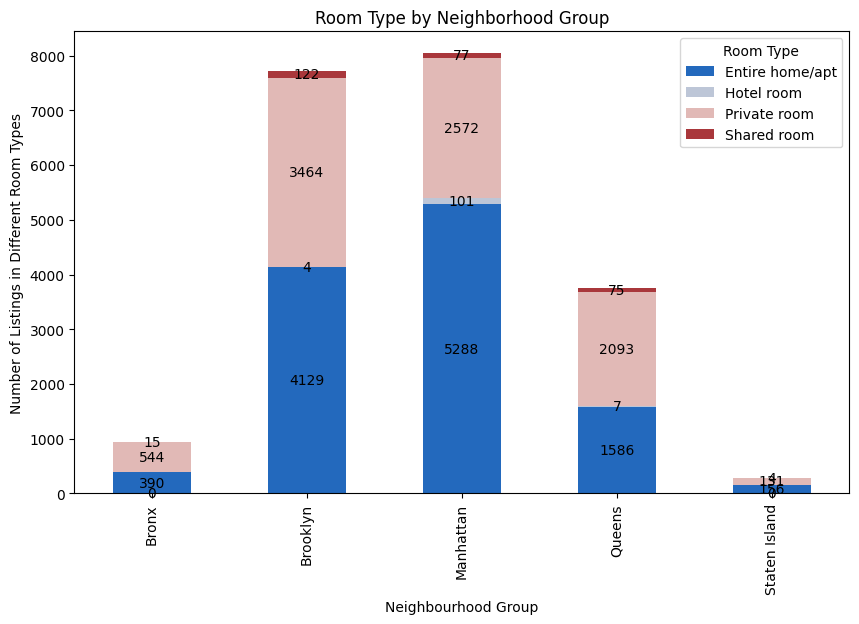

In [ ]:
# Count room types in Neighbourhood Group
plt.figure(figsize=(10, 6))

# ax = sns.histplot(data=df, x='neighbourhood_group', hue='room_type', multiple='stack', palette='vlag')

# Count the number of listings by neighborhood group and room type
room_type_counts = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()

# Plot the stacked bar chart
ax = room_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='vlag')

# Add the count in each bar
for bar_group in ax.containers:
    ax.bar_label(bar_group, label_type='center', fmt='%d', fontsize=10)

# Set plot titles and labels
plt.title('Room Type by Neighborhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings in Different Room Types')
plt.legend(title='Room Type')

# Display the plot
plt.show()

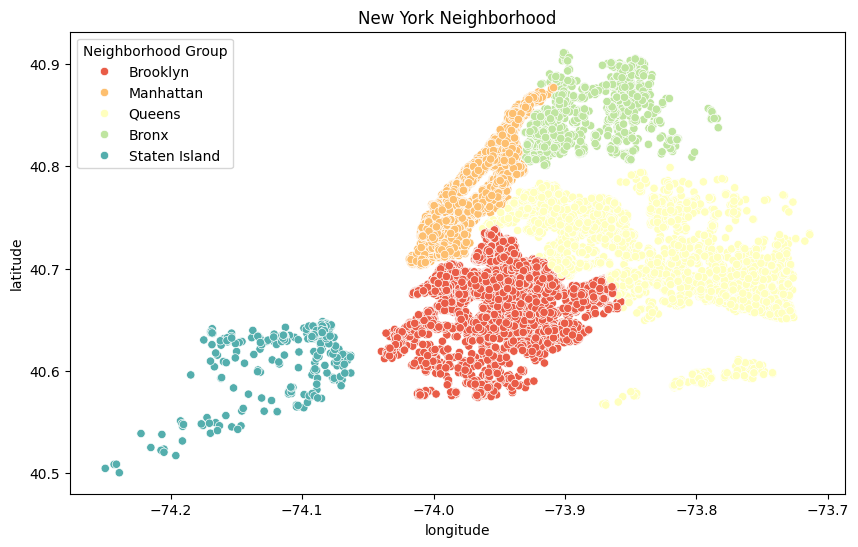

In [ ]:
# Represent the neighborhood on map
f,ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(y=df.latitude, x=df.longitude, hue=df.neighbourhood_group, palette='Spectral')

# Set plot titles and labels
plt.title('New York Neighborhood')
plt.legend(title='Neighborhood Group')

# Display the plot
plt.show()

Average Price by Neighborhood Group:
neighbourhood_group
Bronx            118.407798
Brooklyn         187.033942
Manhattan        227.854193
Queens           126.489232
Staten Island    118.780069
Name: price, dtype: float64


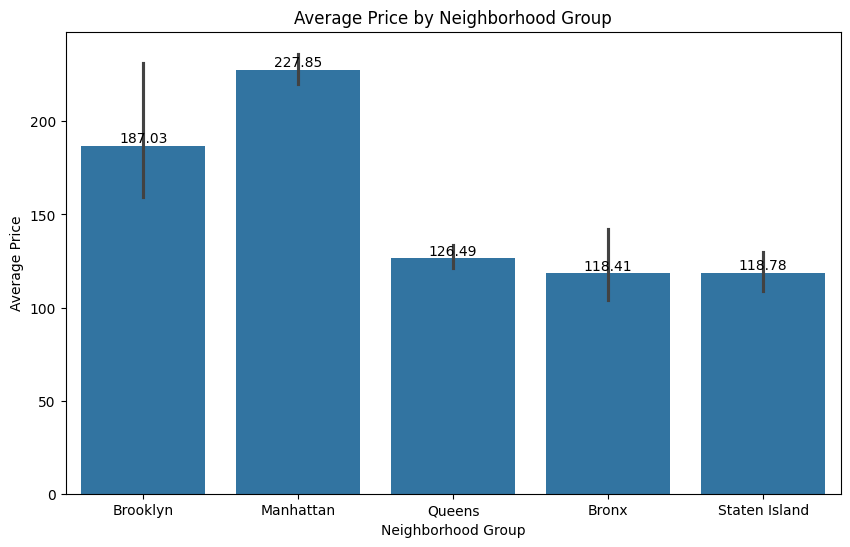

In [ ]:
# Calculate the average price for each neighborhood group
mean_price_by_neighborhood_group = df.groupby('neighbourhood_group')['price'].mean()

# Display the results
print("Average Price by Neighborhood Group:")
print(mean_price_by_neighborhood_group)

# Plot the mean prices as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean)
# ax = sns.scatterplot(data=df, x='neighbourhood_group', y='price')

# Add the mean values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot titles and labels
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')

# Display the plot
plt.show()

The rooms are mainly distributed in Manhattan and Brooklyn. This distribution is reasonable, as Manhattan is the most densely populated borough among New York's five boroughs, while Brooklyn is the most populous area in New York.

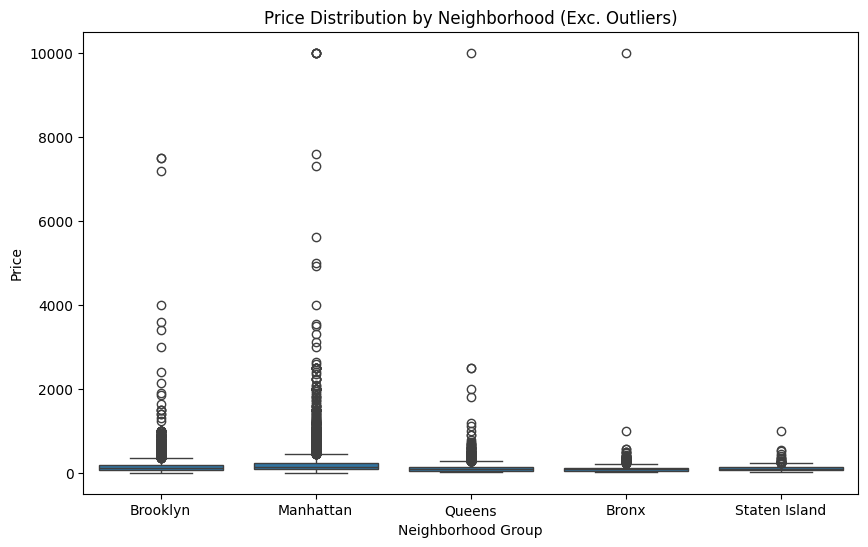

In [ ]:
# Remove the ecords with price greater than 90000 and plot again price distribution
df_filtered = df[df['price'] <= 90000]

# Plot the prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_filtered)

# Set plot titles and labels
plt.title('Price Distribution by Neighborhood (Exc. Outliers)')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')

# Display the plot
plt.show()

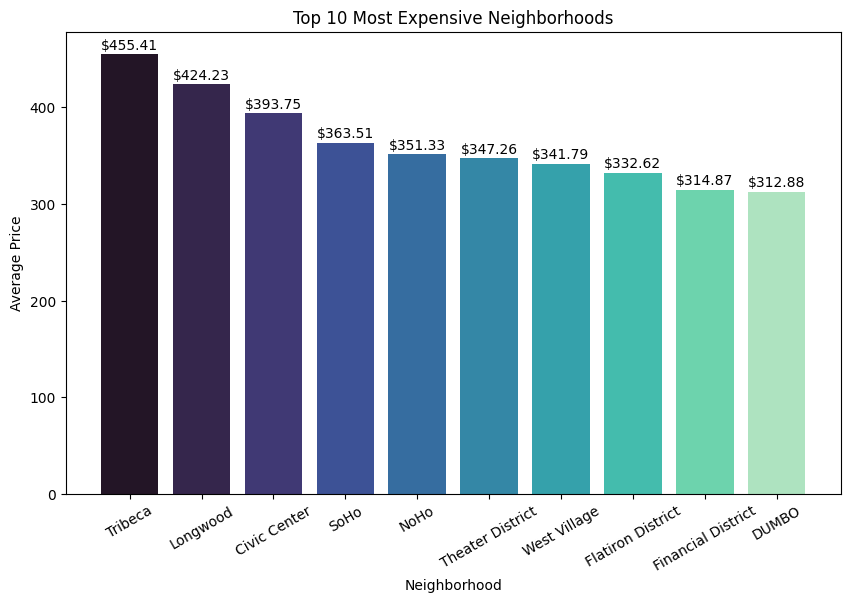

In [ ]:
# Group by neighborhoods and calculate the mean price
neighborhood_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Get the top 10 most expensive neighborhoods
top_expensive = neighborhood_prices.head(10)

# Plot the neighnborhoods
plt.figure(figsize=(10, 6))
colors = sns.color_palette('mako', len(top_expensive))
bars = plt.bar(top_expensive.index, top_expensive.values, color=colors)

# Add the price values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f"${bar.get_height():.2f}", ha='center', fontsize=10)

# Set plot titles and labels
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=30, fontsize=10)

# Display the plot
plt.show()

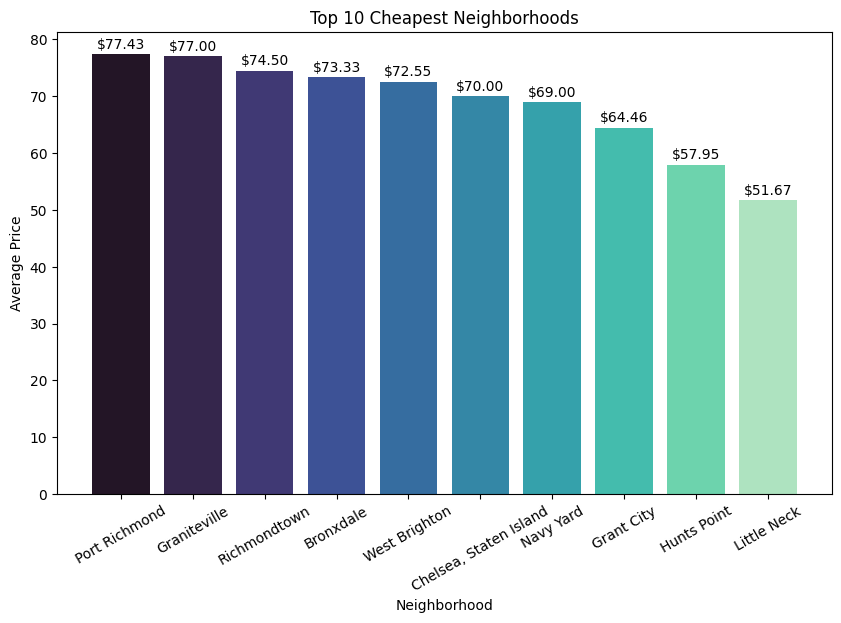

In [ ]:
# Get the bottom 10 cheapest neighborhoods
bottom_cheap = neighborhood_prices.tail(10)

# Plot the neighnborhoods
plt.figure(figsize=(10, 6))
colors = sns.color_palette('mako', len(bottom_cheap))
bars = plt.bar(bottom_cheap.index, bottom_cheap.values, color=colors)

# Add the price values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"${bar.get_height():.2f}", ha='center', fontsize=10)

# Set plot titles and labels
plt.title('Top 10 Cheapest Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=30, fontsize=10)

# Display the plot
plt.show()

## Minimum Nughts

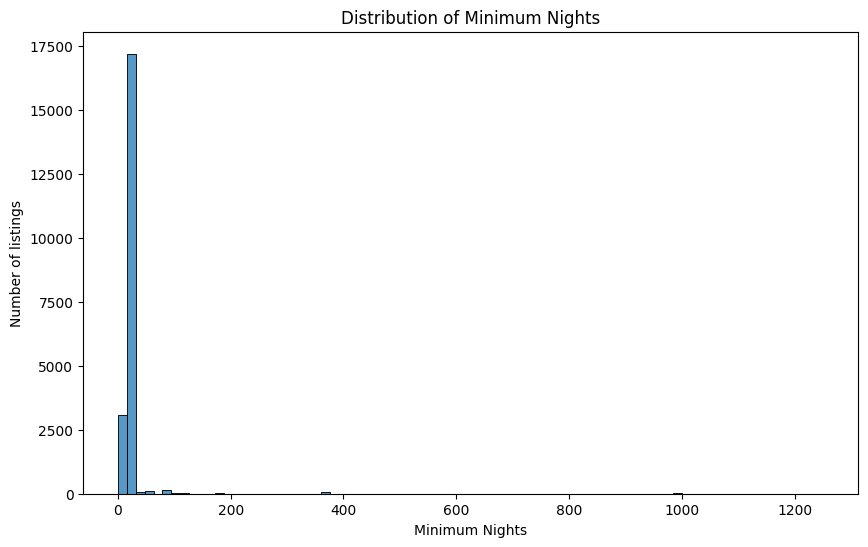

In [ ]:
# Plot the distribution of minimum nights
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=80)

# Set plot titles and labels
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of listings')

# Display the plot
plt.show()

The data shows a very serious skewed distribution, with most rooms requiring a small minimum number of nights for stay.

In [ ]:
df['minimum_nights'].describe(percentiles=[.25, .5, .75, .95, .99])


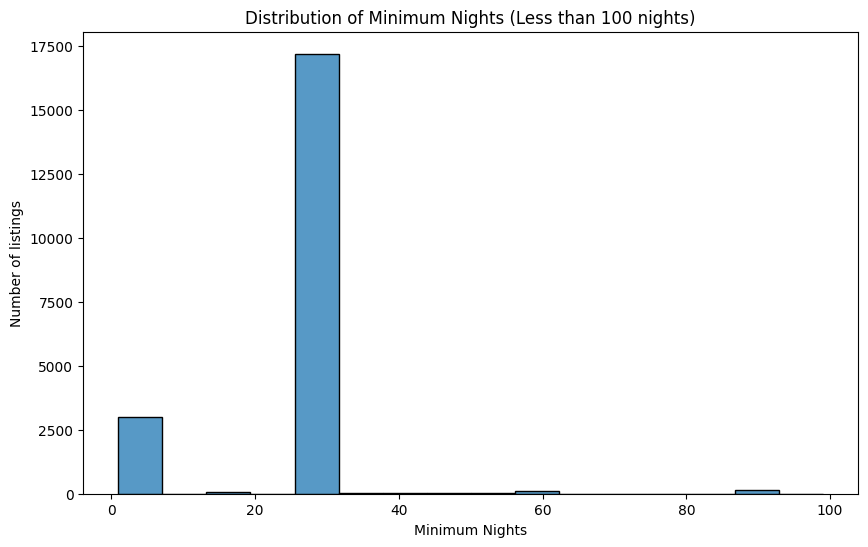

In [ ]:
# Filter data for minimum_nights < 100
df_min_nights = df[df['minimum_nights'] < 100]

# Plot the distribution of minimum nights
plt.figure(figsize=(10, 6))
sns.histplot(df_min_nights['minimum_nights'])

# Set plot titles and labels
plt.title('Distribution of Minimum Nights (< 100 nights)')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of listings')

# Display the plot
plt.show()

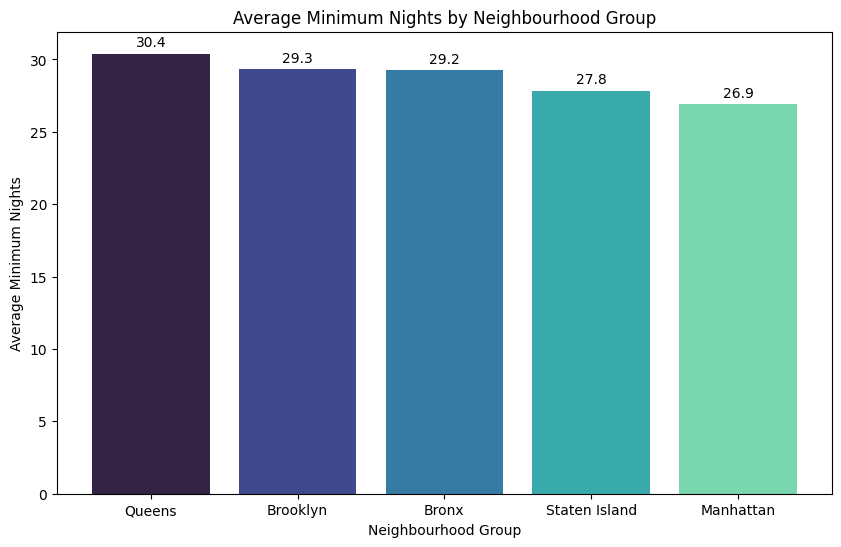

In [ ]:
# Calculate the average minimum nights by neighbourhood group
avg_min_nights_nbhd_gp = df.groupby('neighbourhood_group')['minimum_nights'].mean().sort_values(ascending=False)

# Plot average minimum nights by neighbourhood group
plt.figure(figsize=(10, 6))
colors = sns.color_palette('mako', len(avg_min_nights_nbhd_gp))
bars = plt.bar(avg_min_nights_nbhd_gp.index, avg_min_nights_nbhd_gp.values, color=colors)

# Add numbers above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{bar.get_height():.1f}", ha='center', fontsize=10)

# Set plot titles and labels
plt.title('Average Minimum Nights by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Minimum Nights')

# Display the plot
plt.show()

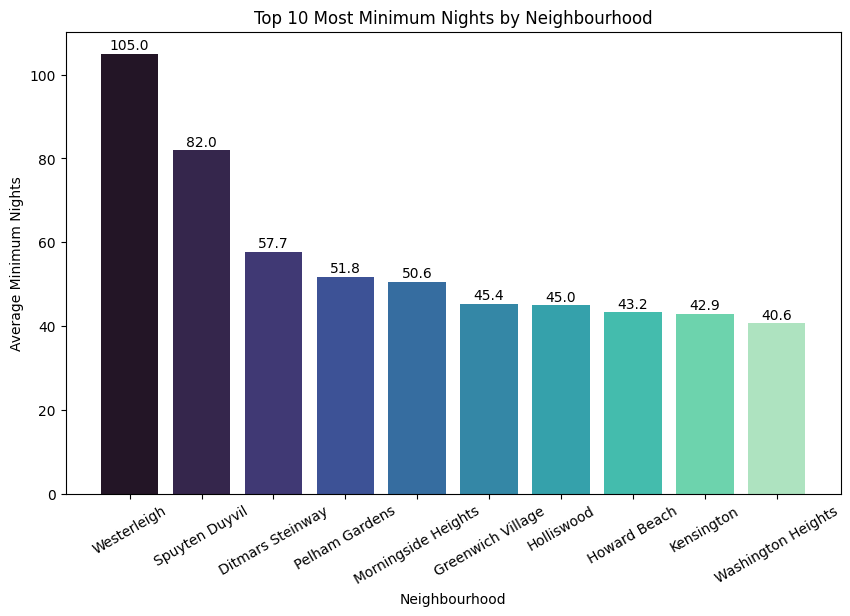

In [ ]:
# Group by neighborhoods and calculate the average minimum nights
neighborhood_min_nights = df.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False)

# Get the top 10 most minimum nights
top_min_nights = neighborhood_min_nights.head(10)

# Plot top 10 average minimum nights by neighbourhood group
plt.figure(figsize=(10, 6))
colors = sns.color_palette('mako', len(top_min_nights))
bars = plt.bar(top_min_nights.index, top_min_nights.values, color=colors)

# Add numbers above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{bar.get_height():.1f}", ha='center', fontsize=10)

# Set plot titles and labels
plt.title('Top 10 Most Minimum Nights by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=30, fontsize=10)

# Display the plot
plt.show()

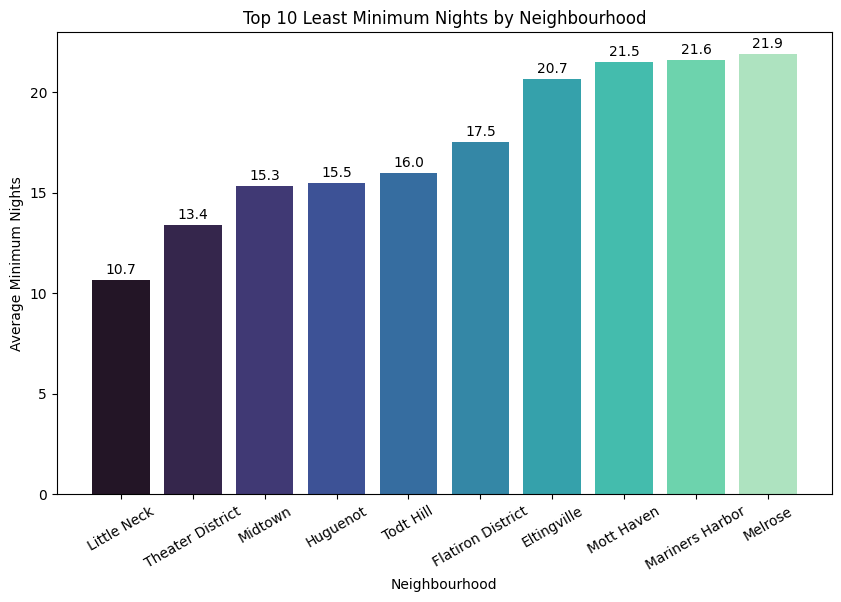

In [ ]:
# Get the bottom 10 minimum nights neighborhoods
bottom_min_nights = neighborhood_min_nights.tail(10).sort_values(ascending=True)

# Plot bottom 10 average minimum nights by neighbourhood group
plt.figure(figsize=(10, 6))
colors = sns.color_palette('mako', len(bottom_min_nights))
bars = plt.bar(bottom_min_nights.index, bottom_min_nights.values, color=colors)

# Add numbers above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3,
             f"{bar.get_height():.1f}", ha='center', fontsize=10)

# Set plot titles and labels
plt.title('Top 10 Least Minimum Nights by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=30, fontsize=10)

# Display the plot
plt.show()

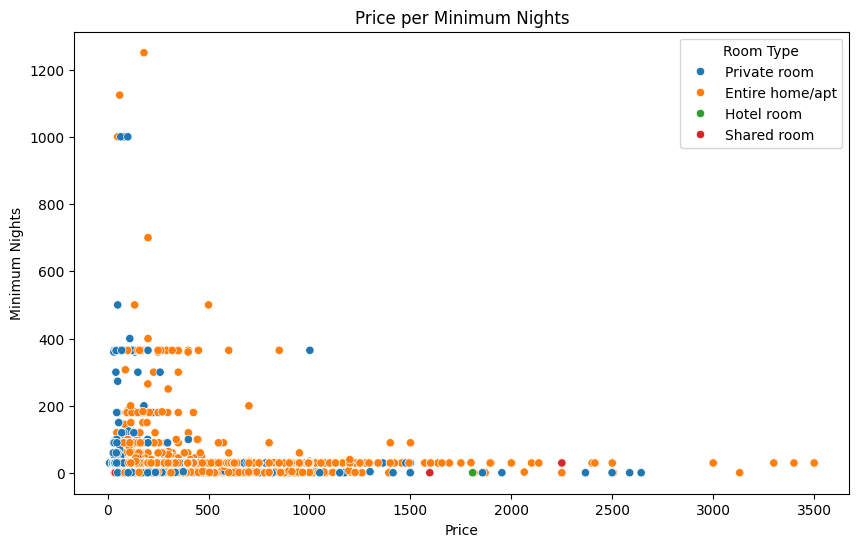

In [ ]:
# Rating per Price
df_night = df[df['price'] <= 3500].copy() # Get rid of price outliers

# Plot Minimum Nights vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_night, x='price', y='minimum_nights', hue='room_type')

# Set plot titles and labels
plt.title('Price per Minimum Nights')
plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.legend(title='Room Type')

# Show the plot
plt.show()

## Ratings

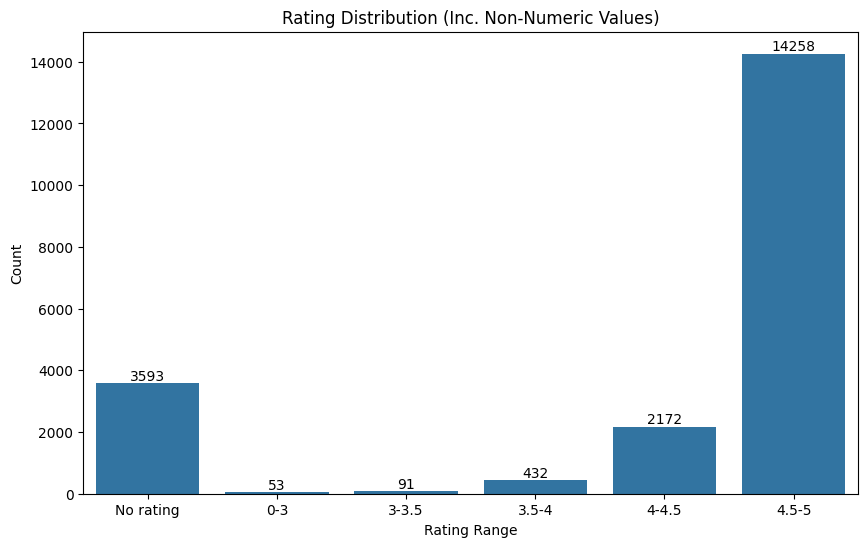

In [ ]:
# Separate numeric and non-numeric ratings
numeric_ratings = pd.to_numeric(df['rating'], errors='coerce')  # Converts strings to NaN if non-numeric
non_numeric_mask = df['rating'].isin(['No rating'])

# Define the rating ranges for numeric values
bins = [0, 3, 3.5, 4, 4.5, 5]
labels = ['0-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

# Create a new column for rating ranges for numeric ratings
df['rating_range'] = pd.cut(numeric_ratings, bins=bins, labels=labels, include_lowest=True)

# Add non-numeric categories to the 'rating_range' column
df['rating_range'] = df['rating_range'].cat.add_categories(['No rating'])

# Assign non-numeric ratings back to the 'rating_range' column
df.loc[non_numeric_mask, 'rating_range'] = df.loc[non_numeric_mask, 'rating']

# Plot the distribution of the rating ranges including non-numeric values
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='rating_range', order=['No rating'] + labels)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot titles and labels
plt.title('Rating Distribution (Inc. Non-Numeric Values)')
plt.xlabel('Rating Range')
plt.ylabel('Count')

# Show the plot
plt.show()

<ipython-input-30-f8cc7ea99fd9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_range_counts = df.groupby(['neighbourhood_group', 'rating_range']).size().unstack()


<Figure size 1000x600 with 0 Axes>

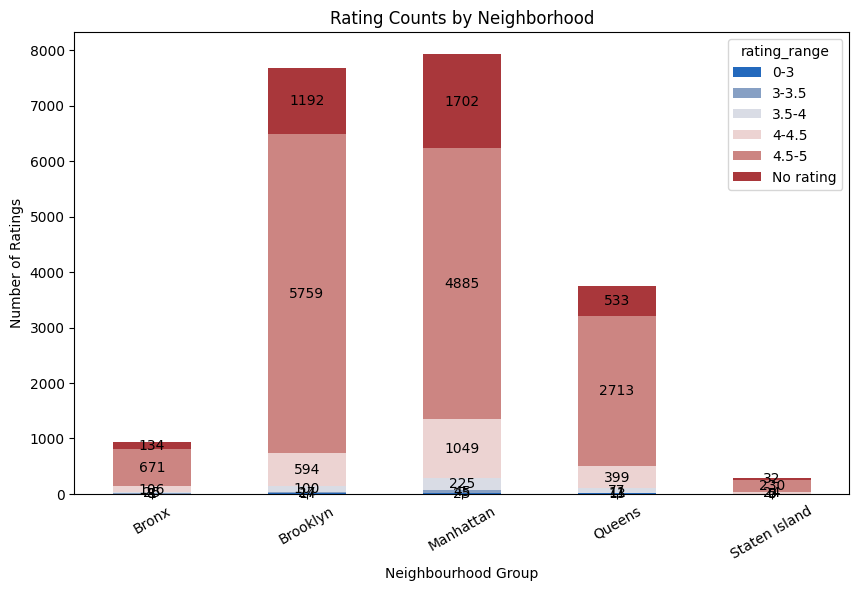

In [ ]:
# Count ratings in Neighbourhood Group
plt.figure(figsize=(10, 6))
# ax = sns.histplot(data=df, x='neighbourhood_group', hue='rating_range', multiple='stack', palette='vlag')

# Count the number of listings by neighborhood group and rating range
rating_range_counts = df.groupby(['neighbourhood_group', 'rating_range']).size().unstack()

# Plot the stacked bar chart
ax = rating_range_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='vlag')

# Add the count above each bar
for bar_group in ax.containers:
    ax.bar_label(bar_group, label_type='center', fmt='%d', fontsize=10)

# Set plot titles and labels
plt.title('Rating Counts by Neighborhood')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=30, fontsize=10)

# Display the plot
plt.show()

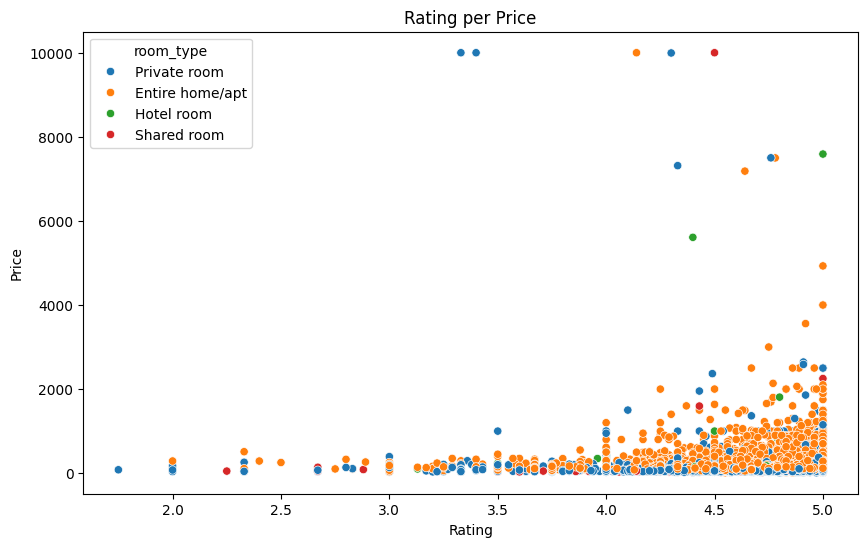

In [ ]:
# Rating per Price
df_ratings = df[df['price'] <= 90000].copy() # Get rid of price outliers
df_ratings['rating'] = pd.to_numeric(df_ratings['rating'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_ratings, x='rating', y='price', hue='room_type')

# Set plot titles and labels
plt.title('Rating per Price')
plt.xlabel('Rating')
plt.ylabel('Price')

# Show the plot
plt.show()

## Reviews

In [ ]:
# Get top 10 neighborhoods with the most reviews
reviews_per_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index(name='count')

avg_reviews_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index(name='avg reviews/apartment')

top_reviews_neighbourhood = reviews_per_neighbourhood.merge(avg_reviews_neighbourhood,on='neighbourhood').sort_values('count',ascending=False).head(10)

print(top_reviews_neighbourhood)

          neighbourhood  count  avg reviews/apartment
13   Bedford-Stuyvesant  90150              56.841110
95               Harlem  54589              51.353716
214        Williamsburg  43141              44.521156
52        Crown Heights  32367              48.745482
28             Bushwick  29375              39.114514
128             Midtown  28402              30.150743
96       Hell's Kitchen  28171              32.492503
65         East Village  20626              49.941889
62          East Harlem  18977              50.605333
4               Astoria  18725              51.869806


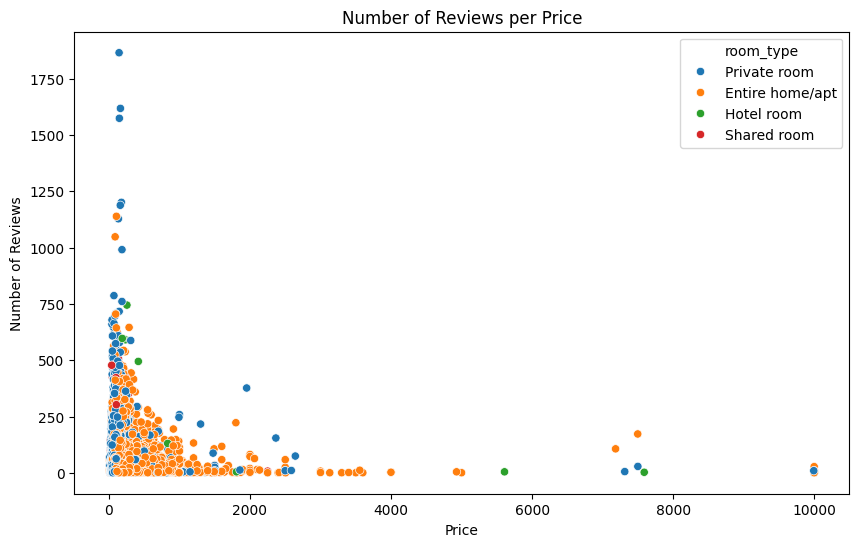

In [ ]:
# Number of Reviews per Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_ratings, x='price', y='number_of_reviews', hue='room_type')

# Set plot titles and labels
plt.title('Number of Reviews per Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

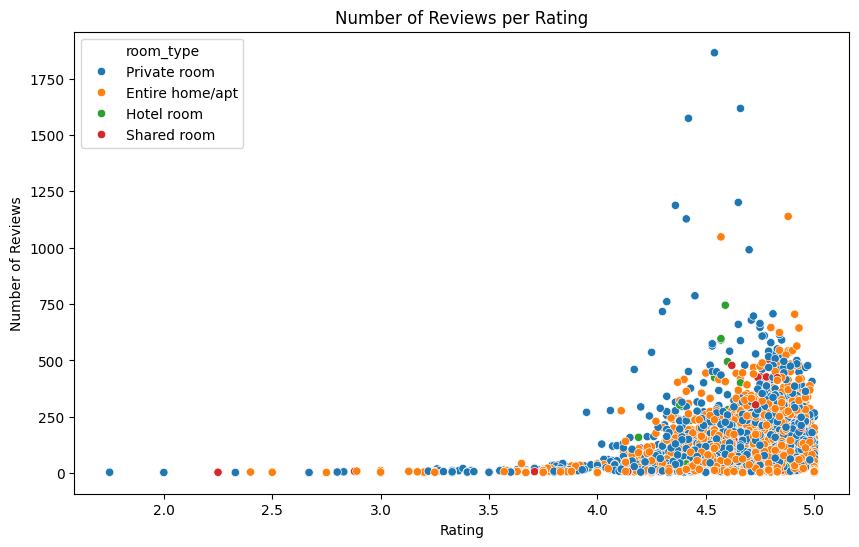

In [ ]:
# Number of Reviews per Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_ratings, x='rating', y='number_of_reviews', hue='room_type')

# Set plot titles and labels
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

## Bedrooms

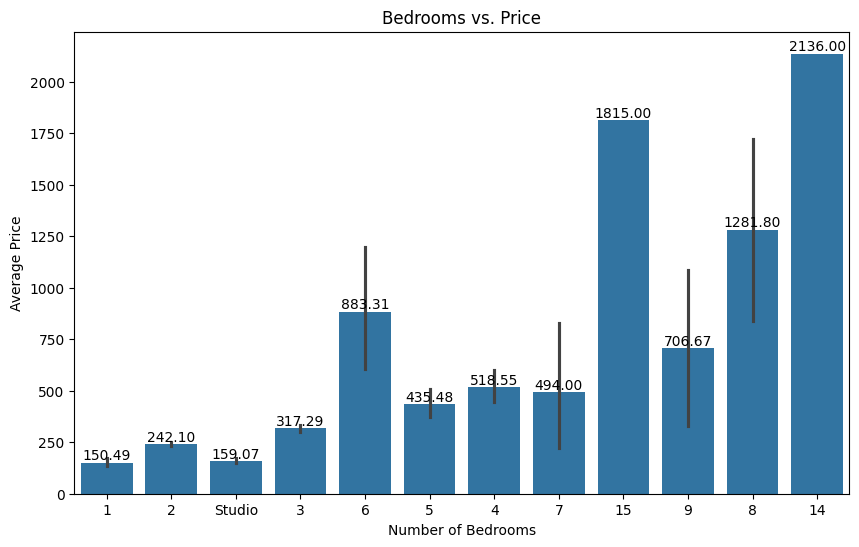

In [ ]:
# Bedrooms vs. Price
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='bedrooms', y='price', estimator=np.mean)

# Add numeric labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot titles and labels
plt.title('Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')

# Show the plot
plt.show()

## Availability

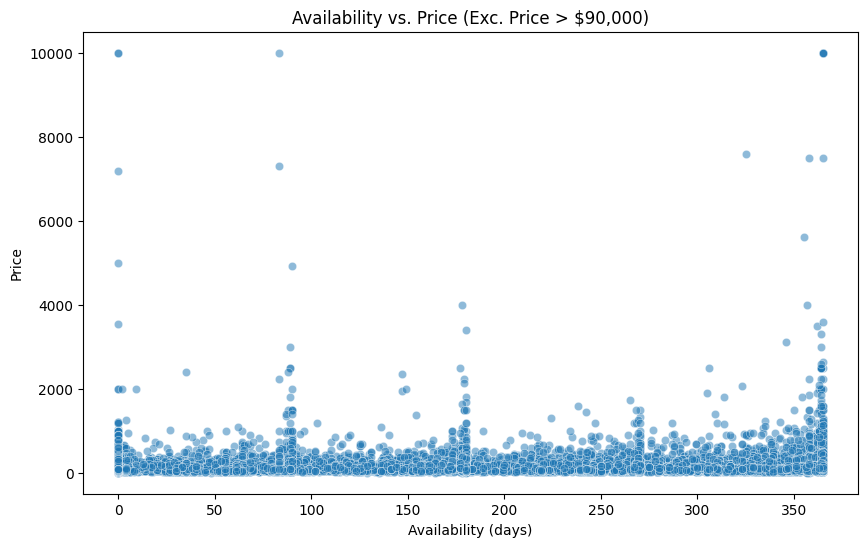

In [ ]:
# Scatter plot for Availability vs. Price after excluding outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='availability_365', y='price', alpha=0.5)

# Set plot titles and labels
plt.title('Availability vs. Price (Exc. Price > $90,000)')
plt.xlabel('Availability (days)')
plt.ylabel('Price')

# Show the plot
plt.show()

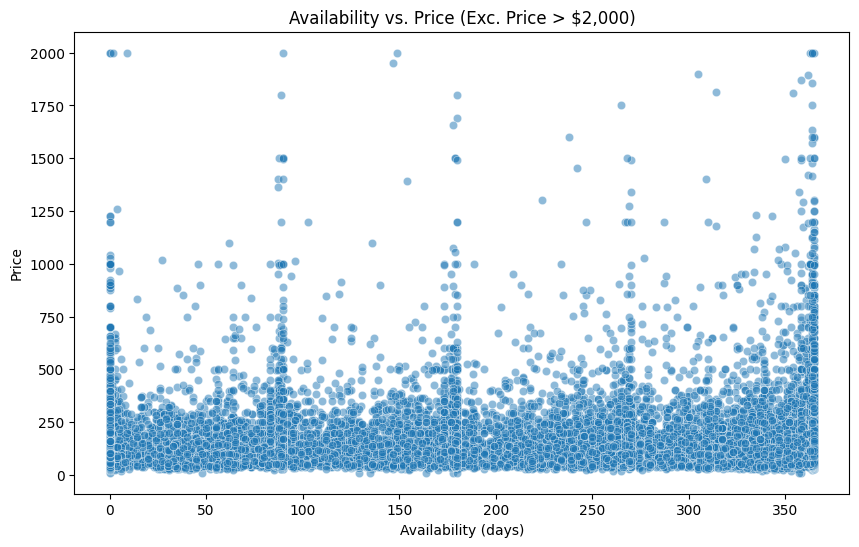

In [ ]:
# Filter out records with price greater than 2000
df_filtered_2 = df[df['price'] <= 2000]

# Scatter plot for Availability vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_2, x='availability_365', y='price', alpha=0.5)

# Set plot titles and labels
plt.title('Availability vs. Price (Exc. Price > $2,000)')
plt.xlabel('Availability (days)')
plt.ylabel('Price')

# Show the plot
plt.show()

## Host ID and Host Name

In [ ]:
# Get top 10 host id distribution
top_host_id = df.groupby('host_id')['host_id'].value_counts().reset_index(name='count').sort_values('count',ascending=False).head(10)

print(top_host_id)

        host_id  count
7695  162280872    146
5359   51501835    129
5665   61391963    113
6739  107434423    107
3528   19303369     87
7279  137358866     81
8426  219517861     81
8191  200239515     70
6959  120762452     69
8237  204704622     62


In [ ]:
top_host_name = df.groupby('host_name')['host_name'].value_counts().reset_index(name='count').sort_values('count',ascending=False).head(10)

print(top_host_name)

            host_name  count
2445         Jeniffer    184
5413  Urban Furnished    176
3626          Michael    148
1229            David    144
5040   Stay With Vibe    113
696        Blueground    107
3402            Maria     98
169              Alex     87
2115           Hiroki     87
1186           Daniel     87


## Correlation Heatmap

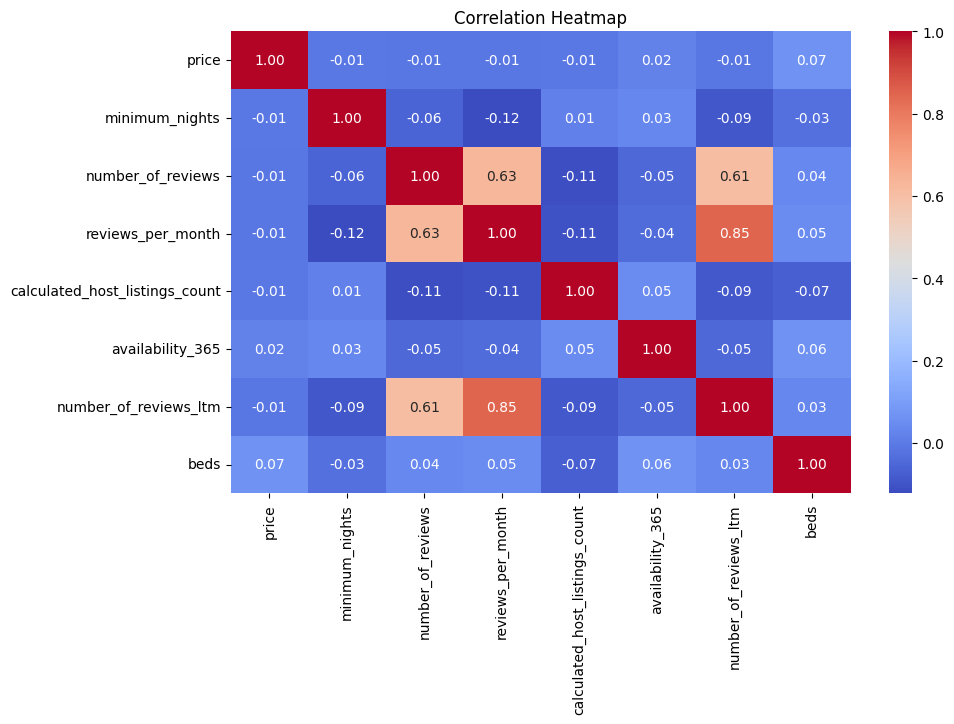

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.drop(['id','host_id', 'latitude', 'longitude'], axis = 1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Set plot titles and labels
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

There is no strong correlation except `number of reviews last month` and `reviews per month`.

*   Correlation > 0.8: `number of reviews last month` vs. `reviews per month`
*   Correlation > 0.6 and <= 0.8: `number of reviews` vs. `eviews per month` and `number of reviews last month` vs. `number of reviews`



# Feature Engineering

## Columns Dropping

In [ ]:
data = df.copy()
data.drop(['name','host_name','id','host_id'],axis=1,inplace=True)
data.head(5)

neighbourhood_group       neighbourhood   latitude  longitude  \
0            Brooklyn        Clinton Hill  40.683710 -73.964610   
1           Manhattan      Hell's Kitchen  40.766610 -73.988100   
2           Manhattan             Chelsea  40.750764 -73.994605   
3           Manhattan  Washington Heights  40.835600 -73.942500   
4           Manhattan         Murray Hill  40.751120 -73.978600   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room   55.0              30                  3  2015-12-20   
1  Entire home/apt  144.0              30                  9  2023-05-01   
2  Entire home/apt  187.0               2                  6  2023-12-18   
3     Private room  120.0              30                156  2023-09-17   
4  Entire home/apt   85.0              30                 11  2023-12-03   

   reviews_per_month  ...  rating  bedrooms  beds          baths  \
0               0.03  ...    5.00         1     1  Not specified   
1               0.24  ...    4.67         2     1              1   
2               1.67  ...    4.17         1     2              1   
3               1.38  ...    4.64         1     1              1   
4               0.24  ...    4.91    Studio     1              1   

                 Name Walk Score  Transit Score Bike Score Population  \
0        Clinton Hill       97.0           99.0       95.0      25887   
1      Hell's Kitchen       99.0          100.0       91.0      51840   
2             Chelsea       99.0          100.0       95.0      52598   
3  Washington Heights       96.0          100.0       72.0     158951   
4         Murray Hill       99.0          100.0       81.0      22249   

   rating_range  
0         4.5-5  
1         4.5-5  
2         4-4.5  
3         4.5-5  
4         4.5-5  

[5 rows x 24 columns]

## Review Recency

In [ ]:
# Create a new column call recency base on last review
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
current_date = datetime.now()
data['review_recency'] = (current_date - data['last_review']).dt.days
data.drop(['last_review'],axis=1,inplace=True)
data.head()

neighbourhood_group       neighbourhood   latitude  longitude  \
0            Brooklyn        Clinton Hill  40.683710 -73.964610   
1           Manhattan      Hell's Kitchen  40.766610 -73.988100   
2           Manhattan             Chelsea  40.750764 -73.994605   
3           Manhattan  Washington Heights  40.835600 -73.942500   
4           Manhattan         Murray Hill  40.751120 -73.978600   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room   55.0              30                  3   
1  Entire home/apt  144.0              30                  9   
2  Entire home/apt  187.0               2                  6   
3     Private room  120.0              30                156   
4  Entire home/apt   85.0              30                 11   

   reviews_per_month  calculated_host_listings_count  ...  bedrooms  beds  \
0               0.03                               1  ...         1     1   
1               0.24                             139  ...         2     1   
2               1.67                               1  ...         1     2   
3               1.38                               2  ...         1     1   
4               0.24                             133  ...         0     1   

           baths                Name  Walk Score  Transit Score Bike Score  \
0  Not specified        Clinton Hill        97.0           99.0       95.0   
1              1      Hell's Kitchen        99.0          100.0       91.0   
2              1             Chelsea        99.0          100.0       95.0   
3              1  Washington Heights        96.0          100.0       72.0   
4              1         Murray Hill        99.0          100.0       81.0   

  Population  rating_range  review_recency  
0      25887         4.5-5            3272  
1      51840         4.5-5             583  
2      52598         4-4.5             352  
3     158951         4.5-5             444  
4      22249         4.5-5             367  

[5 rows x 24 columns]

## Rating

In [ ]:
# Create dummy variables for the 'rating_range' column
rating_dummies = pd.get_dummies(data['rating_range'], prefix='rating', drop_first=True)
rating_dummies = rating_dummies.astype(int)
# Merge dummy variables with the original dataframe
data = pd.concat([data, rating_dummies], axis=1)

In [ ]:
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'Walk Score', 'Transit Score',
       'Bike Score', 'Population', 'rating_range', 'review_recency',
       'rating_3-3.5', 'rating_3.5-4', 'rating_4-4.5', 'rating_4.5-5',
       'rating_New ', 'rating_No rating'],
      dtype='object')

In [ ]:
data.drop(['rating_New ','rating_No rating','rating_range'],axis=1, inplace=True)

data.head()

neighbourhood_group  neighbourhood   latitude  longitude  room_type  price  \
0                    1             42  40.683710 -73.964610          2   55.0   
1                    2             96  40.766610 -73.988100          0  144.0   
2                    2             34  40.750764 -73.994605          0  187.0   
3                    2            206  40.835600 -73.942500          2  120.0   
4                    2            138  40.751120 -73.978600          0   85.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0              30                  3               0.03   
1              30                  9               0.24   
2               2                  6               1.67   
3              30                156               1.38   
4              30                 11               0.24   

   calculated_host_listings_count  ...  baths  Walk Score  Transit Score  \
0                               1  ...    0.0        97.0           99.0   
1                             139  ...    1.0        99.0          100.0   
2                               1  ...    1.0        99.0          100.0   
3                               2  ...    1.0        96.0          100.0   
4                             133  ...    1.0        99.0          100.0   

   Bike Score  Population  review_recency  rating_3-3.5  rating_3.5-4  \
0        95.0       25887            3272             0             0   
1        91.0       51840             583             0             0   
2        95.0       52598             352             0             0   
3        72.0      158951             444             0             0   
4        81.0       22249             367             0             0   

   rating_4-4.5  rating_4.5-5  
0             0             1  
1             0             1  
2             1             0  
3             0             1  
4             0             1  

[5 rows x 26 columns]

## Bedrooms

In [ ]:
# Replace "Studio" in the 'bedrooms' column with 0
data['bedrooms'] = data['bedrooms'].replace('Studio', 0)
data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce')

## Baths

In [ ]:
# Replace 'Not specified' with 0 in the 'baths' column
data['baths'] = data['baths'].replace('Not specified', 0)
print("Updated unique values in the 'baths' column:")
print(data['baths'].unique())

Updated unique values in the 'baths' column:
[0 '1' '2' '1.5' '3' '4' '3.5' '0' '2.5' '5' '4.5' '6' '5.5' '11.5' '6.5'
 '7' '15.5']


In [ ]:
data['baths'] = pd.to_numeric(data['baths'], errors='coerce').fillna(0).astype(float)
data['baths']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
20753    1.0
20754    1.0
20755    1.0
20756    1.0
20757    1.0
Name: baths, Length: 20758, dtype: float64

## Missing Values

In [ ]:
# Handling Missing Value
# give null value of walk score, bike score, transit score and population that share the closest longtitude and lagitude

In [ ]:
from scipy.spatial import KDTree

df_missing = data[data.isnull().any(axis=1)]
df_complete = data.dropna()
missing_coords = df_missing[['latitude', 'longitude']].values
complete_coords = df_complete[['latitude', 'longitude']].values

tree = KDTree(complete_coords)

distances, indices = tree.query(missing_coords)

for i, idx in enumerate(df_missing.index):
    closest_index = df_complete.index[indices[i]]
    for col in ['Walk Score', 'Bike Score', 'Transit Score', 'Population']:
        data.loc[idx, col] = df_complete.loc[closest_index, col]

data.head()

neighbourhood_group       neighbourhood   latitude  longitude  \
0            Brooklyn        Clinton Hill  40.683710 -73.964610   
1           Manhattan      Hell's Kitchen  40.766610 -73.988100   
2           Manhattan             Chelsea  40.750764 -73.994605   
3           Manhattan  Washington Heights  40.835600 -73.942500   
4           Manhattan         Murray Hill  40.751120 -73.978600   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room   55.0              30                  3   
1  Entire home/apt  144.0              30                  9   
2  Entire home/apt  187.0               2                  6   
3     Private room  120.0              30                156   
4  Entire home/apt   85.0              30                 11   

   reviews_per_month  calculated_host_listings_count  ...  bedrooms  beds  \
0               0.03                               1  ...         1     1   
1               0.24                             139  ...         2     1   
2               1.67                               1  ...         1     2   
3               1.38                               2  ...         1     1   
4               0.24                             133  ...         0     1   

  baths                Name  Walk Score  Transit Score  Bike Score Population  \
0   0.0        Clinton Hill        97.0           99.0        95.0      25887   
1   1.0      Hell's Kitchen        99.0          100.0        91.0      51840   
2   1.0             Chelsea        99.0          100.0        95.0      52598   
3   1.0  Washington Heights        96.0          100.0        72.0     158951   
4   1.0         Murray Hill        99.0          100.0        81.0      22249   

   rating_range  review_recency  
0         4.5-5            3272  
1         4.5-5             583  
2         4-4.5             352  
3         4.5-5             444  
4         4.5-5             367  

[5 rows x 24 columns]

In [ ]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
Walk Score                        0
Transit Score                     0
Bike Score                        0
Population                        0
rating_range                      0
review_recency                    0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             20758 non-null  object  
 1   neighbourhood                   20758 non-null  object  
 2   latitude                        20758 non-null  float64 
 3   longitude                       20758 non-null  float64 
 4   room_type                       20758 non-null  object  
 5   price                           20758 non-null  float64 
 6   minimum_nights                  20758 non-null  int64   
 7   number_of_reviews               20758 non-null  int64   
 8   reviews_per_month               20758 non-null  float64 
 9   calculated_host_listings_count  20758 non-null  int64   
 10  availability_365                20758 non-null  int64   
 11  number_of_reviews_ltm           20758 non-null  int64   
 12  license           

## Outliers

In [1]:
# Outliers
num_features = ['price','bedrooms', 'beds']

print(num_features)

['price', 'bedrooms', 'beds']


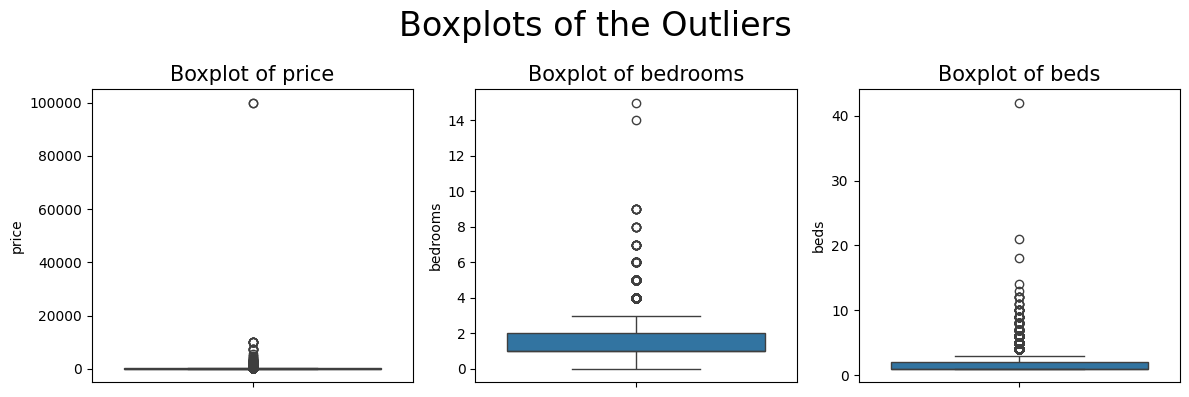

In [ ]:
for i in range(1):

    fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,4))

    ax1 = sns.boxplot(data[num_features[i*3]],ax=ax1)
    ax1.set_title(f'Boxplot of {num_features[i*3]}',fontsize=15)

    ax2 = sns.boxplot(data[num_features[i*3+1]],ax=ax2)
    ax2.set_title(f'Boxplot of {num_features[i*3+1]}',fontsize=15)

    ax3 = sns.boxplot(data[num_features[i*3+2]],ax=ax3)
    ax3.set_title(f'Boxplot of {num_features[i*3+2]}',fontsize=15)

    fig.suptitle("Boxplots of the Outliers",fontsize=24)

    plt.tight_layout()

In [ ]:
outliers_perc = []

for k,v in data[num_features].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    out_tuple = (k,int(perc))
    outliers_perc.append(out_tuple)
    print("Column %s outliers = %.2f%%" % (k,perc))

Column price outliers = 6.67%
Column bedrooms outliers = 2.45%
Column beds outliers = 7.64%


In [ ]:
def outlier_capper(dt,features):

    data_out = dt.copy()

    for column in features:

        # First define the first and third quartiles
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL  = Q1 - 1 * IQR
        higherL = Q3 + 1 * IQR

        # Impute 'left' outliers
        data_out.loc[data_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        data_out.loc[data_out[column] > higherL,column] = higherL

    return data_out


data = outlier_capper(data,num_features)


## Label Encoding

In [ ]:
# Label encoding for the category variable
from sklearn.preprocessing import LabelEncoder
cat_features = ['neighbourhood_group','neighbourhood','room_type','license']
encoder = LabelEncoder()
for col in cat_features:
    data[col] = data[col].astype(str)
    data[col] = encoder.fit_transform(data[col])

data.head()

neighbourhood_group  neighbourhood   latitude  longitude  room_type  price  \
0                    1             42  40.683710 -73.964610          2   55.0   
1                    2             96  40.766610 -73.988100          0  144.0   
2                    2             34  40.750764 -73.994605          0  187.0   
3                    2            206  40.835600 -73.942500          2  120.0   
4                    2            138  40.751120 -73.978600          0   85.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0              30                  3               0.03   
1              30                  9               0.24   
2               2                  6               1.67   
3              30                156               1.38   
4              30                 11               0.24   

   calculated_host_listings_count  ...  rating  bedrooms  beds  baths  \
0                               1  ...    5.00         1     1    0.0   
1                             139  ...    4.67         2     1    1.0   
2                               1  ...    4.17         1     2    1.0   
3                               2  ...    4.64         1     1    1.0   
4                             133  ...    4.91         0     1    1.0   

   Walk Score  Transit Score  Bike Score  Population  rating_range  \
0        97.0           99.0        95.0       25887         4.5-5   
1        99.0          100.0        91.0       51840         4.5-5   
2        99.0          100.0        95.0       52598         4-4.5   
3        96.0          100.0        72.0      158951         4.5-5   
4        99.0          100.0        81.0       22249         4.5-5   

   review_recency  
0            3272  
1             583  
2             352  
3             444  
4             367  

[5 rows x 23 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             20758 non-null  int64  
 1   neighbourhood                   20758 non-null  int64  
 2   latitude                        20758 non-null  float64
 3   longitude                       20758 non-null  float64
 4   room_type                       20758 non-null  int64  
 5   price                           20758 non-null  float64
 6   minimum_nights                  20758 non-null  int64  
 7   number_of_reviews               20758 non-null  int64  
 8   reviews_per_month               20758 non-null  float64
 9   calculated_host_listings_count  20758 non-null  int64  
 10  availability_365                20758 non-null  int64  
 11  number_of_reviews_ltm           20758 non-null  int64  
 12  license                         

## Correlation Heatmap

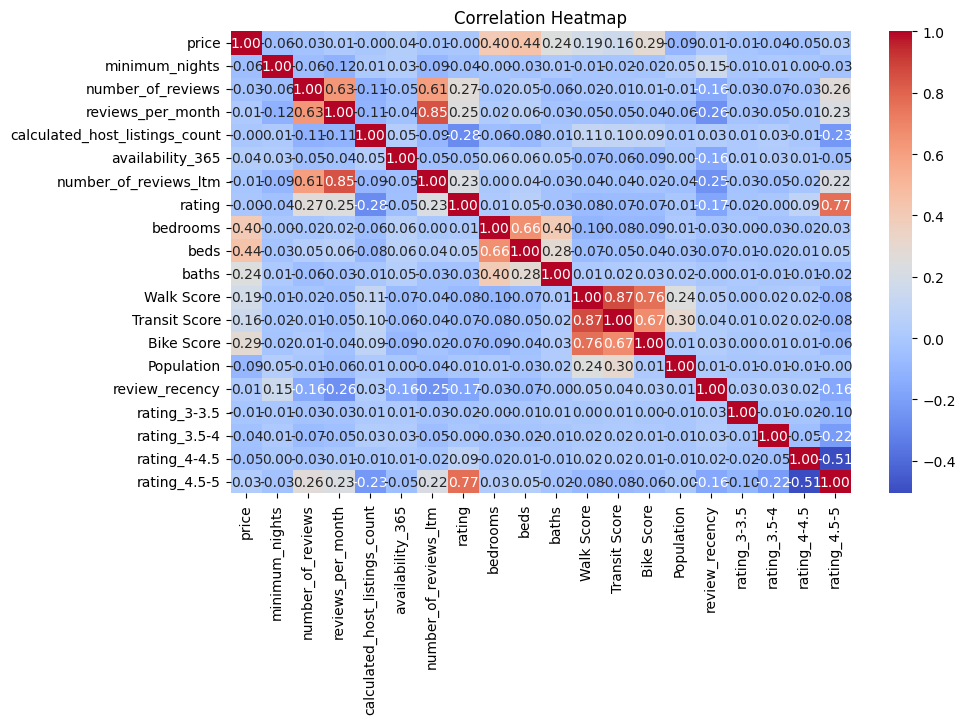

In [ ]:
# Correlation Heatmap for numerical variable
plt.figure(figsize=(10, 6))
corr = data.drop(['latitude', 'longitude','room_type','license','neighbourhood_group','neighbourhood'], axis = 1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Training

In [ ]:
X = data.drop(['price'], axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

neighbourhood_group  neighbourhood   latitude  longitude  room_type  \
9958                     3            183  40.666829 -73.768520          2   
7841                     2             36  40.714041 -73.994907          2   
9293                     1             13  40.682180 -73.936150          0   
15209                    2            197  40.718160 -74.008710          0   
16515                    2             62  40.807470 -73.940760          0   

       minimum_nights  number_of_reviews  reviews_per_month  \
9958               30                  5               0.77   
7841               30                  6               1.31   
9293               30                 67               2.40   
15209              30                  1               0.19   
16515              30                388               2.42   

       calculated_host_listings_count  availability_365  ...  baths  \
9958                                3               364  ...    1.0   
7841                               11               245  ...    2.0   
9293                                2               341  ...    1.0   
15209                               1               127  ...    1.0   
16515                               2               231  ...    1.0   

       Walk Score  Transit Score  Bike Score  Population  review_recency  \
9958         61.0           66.0        52.0        8826             466   
7841        100.0          100.0        94.0       13724             391   
9293         94.0           97.0        79.0      153040             370   
15209        99.0          100.0        90.0       17068             491   
16515        96.0          100.0        80.0      118829             369   

       rating_3-3.5  rating_3.5-4  rating_4-4.5  rating_4.5-5  
9958              0             1             0             0  
7841              0             0             0             1  
9293              0             0             0             1  
15209             0             0             0             0  
16515             0             0             0             1  

[5 rows x 25 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Linear Regression


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred =lr.predict(X_test)

r2_score(y_test, y_pred)

0.42850955175250705

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error:", mse)
print("R²:", r2)

Mean Square Error: 3977.1514769710147
R²: 0.428896548402831


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.043e+05, tolerance: 1.208e+04
  model = cd_fast.enet_coordinate_descent(


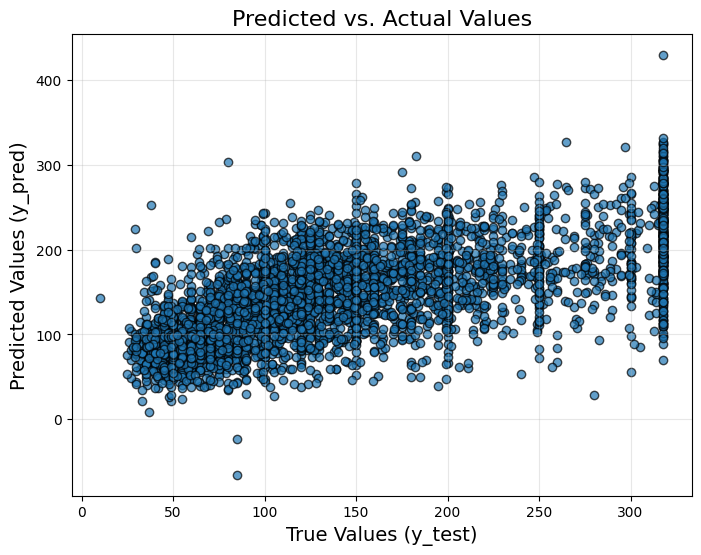

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title("Predicted vs. Actual Values", fontsize=16)
plt.xlabel("True Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values (y_pred)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

## 2. Random Forest

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2761.3846639450867
R² Score: 0.6034759244403752


In [ ]:
rfr_predict_ytrain = rf_regressor.predict(X_train)
rfr_predict_ytest = rf_regressor.predict(X_test)
base_rfr_result=pd.DataFrame({'model':['RandomForestRegressor'],
                'CV_rfr_r2:':r2,
                'train error:':mean_squared_error(rfr_predict_ytrain,y_train),
                'test error:':mean_squared_error(rfr_predict_ytest,y_test)})
base_rfr_result

model  CV_rfr_r2:  train error:  test error:
0  RandomForestRegressor    0.603476    386.712645  2761.384664

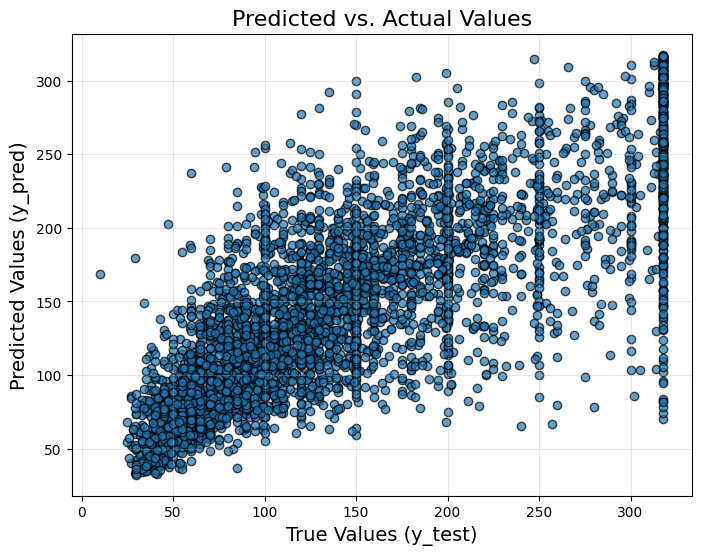

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title("Predicted vs. Actual Values", fontsize=16)
plt.xlabel("True Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values (y_pred)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

## 3. XGBoosting

In [ ]:
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"Mean Squared Error: {xgb_mse}")
print(f"R² Score: {xgb_r2}")

Mean Squared Error: 2710.722154148777
R² Score: 0.6107508633957512


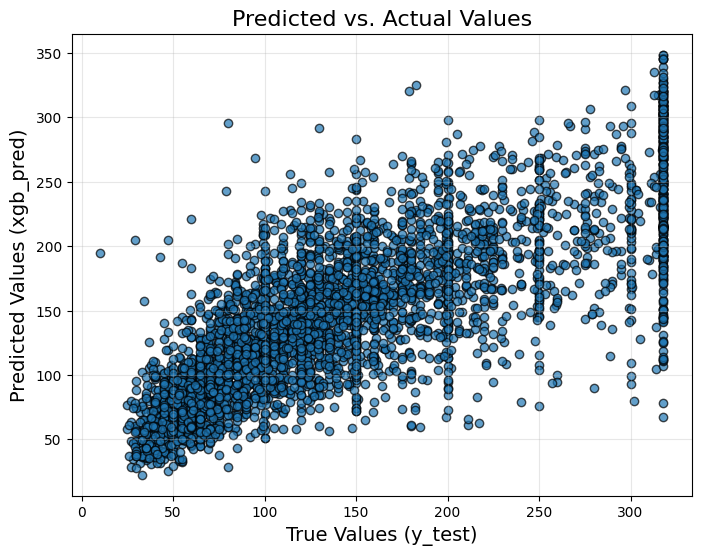

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_pred, alpha=0.7, edgecolors='k')
plt.title("Predicted vs. Actual Values", fontsize=16)
plt.xlabel("True Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values (xgb_pred)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

## 4. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# Evaluate the model
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)

print(f"Mean Squared Error: {gbr_mse}")
print(f"R² Score: {gbr_r2}")

Mean Squared Error: 2741.4885384342183
R² Score: 0.606332930520848


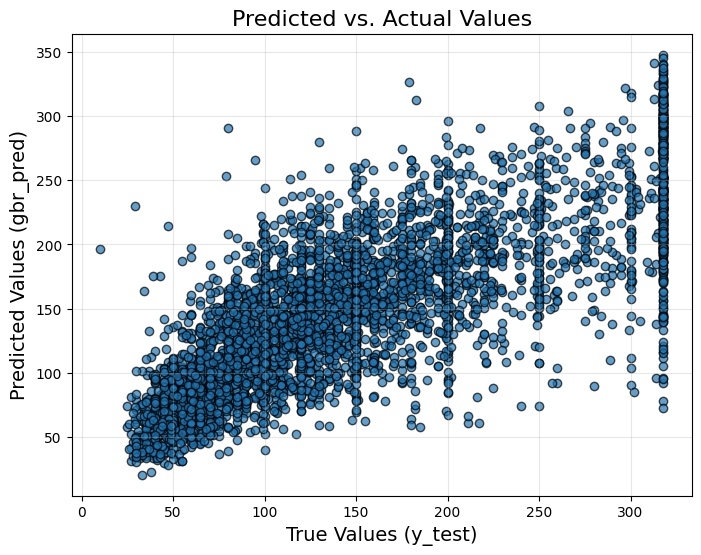

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gbr_pred, alpha=0.7, edgecolors='k')
plt.title("Predicted vs. Actual Values", fontsize=16)
plt.xlabel("True Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values (gbr_pred)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

## 5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Mean Squared Error: {dt_mse}")
print(f"R² Score: {dt_r2}")

Mean Squared Error: 5429.592967244701
R² Score: 0.22033161112516442


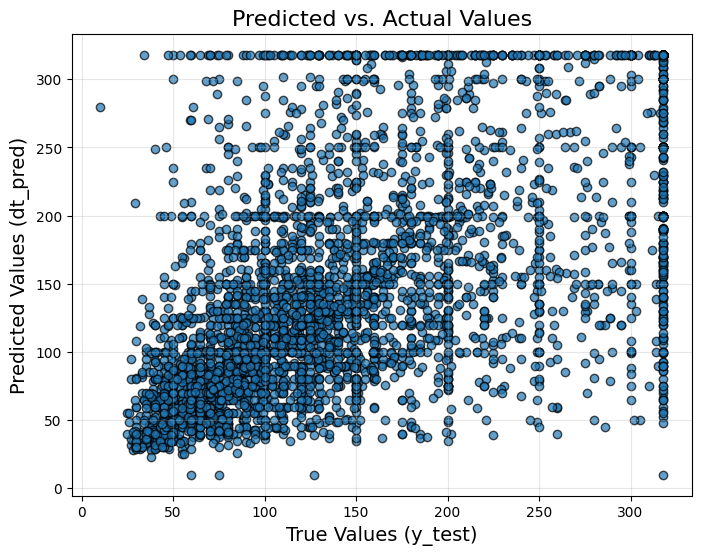

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_pred, alpha=0.7, edgecolors='k')
plt.title("Predicted vs. Actual Values", fontsize=16)
plt.xlabel("True Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values (dt_pred)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV
n_estimators=[x for x in range(20,2000,20)]
max_depth=[x for x in range(10,100,11)]
max_features=['auto','sqrt']
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap
}
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions = random_grid, n_iter=50, cv = 3, verbose=2, random_state=42)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1860; total time=   0.0s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1860; total time=   0.0s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1860; total time=   0.0s
[CV] END bootstrap=True, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time=  32.5s
[CV] END bootstrap=True, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time=  30.4s
[CV] END bootstrap=True, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time=  30.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
69 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200, 220, 240, 260,
                                                         280, 300, 320, 340,
                                                         360, 380, 400, 420,
                                                         440, 460, 480, 500,
                                                         520, 540, 560, 580,
                                                         600, ...]},
                   random_state=42, verbose=2)

In [ ]:
#best model
best_rfr=rf_random.best_estimator_
best_rfr


RandomForestRegressor(bootstrap=False, max_depth=54, max_features='sqrt',
                      min_samples_split=5, n_estimators=1560, random_state=42)

Mean Squared Error: 2616.103540171589
R² Score: 0.6243377275975812


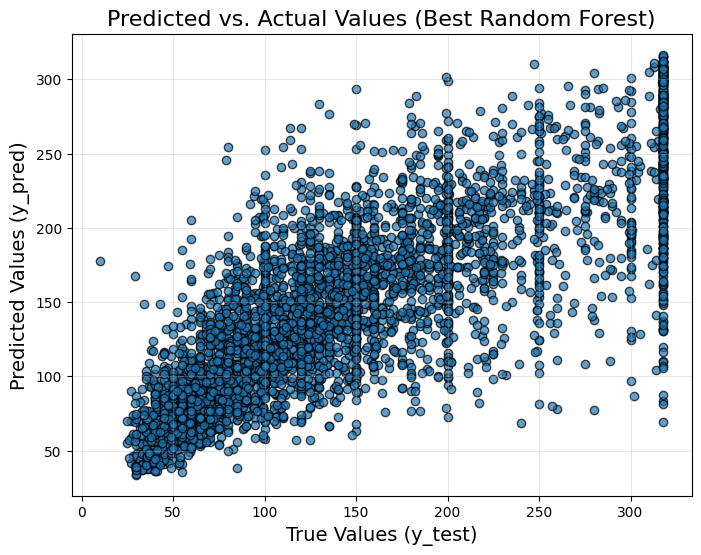

In [ ]:
# Use the best model found through hyperparameter tuning (best_rfr)
y_pred = best_rfr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualize the predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title("Predicted vs. Actual Values (Best Random Forest)", fontsize=16)
plt.xlabel("True Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values (y_pred)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

The model's score has improved, but the results are still not very good. Considering that the dataset actually has many dummy variables and a lot of features, I plan to use feature selection to eliminate some features and then model again to see the effect.

In [ ]:
from sklearn.preprocessing import scale,RobustScaler
# Standardize the entire dataset
columns=X.columns.tolist()
scaler=RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=columns)
X.head()
# Perform feature selection
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(.9*(1-.9))
X_var = selector.fit_transform(X)
# Get the columns of the selected features
X_var_columns = X.columns[selector.get_support(indices=True)]
X_var = pd.DataFrame(X_var,columns=X_var_columns)
X_var.head()


neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                 -1.0      -0.477477 -0.495393  -0.237516        1.0   
1                  0.0       0.009009  0.554672  -0.608900        0.0   
2                  0.0      -0.549550  0.353951  -0.711748        0.0   
3                  0.0       1.000000  1.428544   0.112050        1.0   
4                  0.0       0.387387  0.358466  -0.458702        0.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0             0.0          -0.244444          -0.389937   
1             0.0          -0.111111          -0.257862   
2           -28.0          -0.177778           0.641509   
3             0.0           3.155556           0.459119   
4             0.0          -0.066667          -0.257862   

   calculated_host_listings_count  availability_365  ...  bedrooms  beds  \
0                           -0.25         -0.808271  ...       0.0   0.0   
1                           34.25          0.560150  ...       1.0   0.0   
2                           -0.25          0.481203  ...       0.0   1.0   
3                            0.00          0.556391  ...       0.0   0.0   
4                           32.75          0.451128  ...      -1.0   0.0   

   baths  Walk Score  Transit Score  Bike Score  Population  review_recency  \
0   -1.0         0.2       0.142857      0.8750   -0.545402       12.255411   
1    0.0         0.6       0.285714      0.6250   -0.295388        0.614719   
2    0.0         0.6       0.285714      0.8750   -0.288085       -0.385281   
3    0.0         0.0       0.285714     -0.5625    0.736451        0.012987   
4    0.0         0.6       0.285714      0.0000   -0.580448       -0.320346   

   rating_4-4.5  rating_4.5-5  
0           0.0           0.0  
1           0.0           0.0  
2           1.0          -1.0  
3           0.0           0.0  
4           0.0           0.0  

[5 rows x 23 columns]

In [ ]:
# Split the dataset into training and testing sets again
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

Tuning parameters: Important parameters in the random forest model include n_estimators, max_depth, max_features, min_sample_leaf, and min_sample_split. The n_estimators parameter determines the number of trees in the forest model, while the other parameters determine the features of each tree. Tuning the latter parameters first and then tuning n_estimators will improve efficiency while obtaining a relatively more reasonable model. First, perform exploratory cross-validation on the four parameters: max_depth, max_features, min_sample_leaf, and min_sample_split.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [ ]:
#To avoid warning messages, the `n_estimators` is set to 10 here.
n_estimators=[10]
max_depth=[i for i in range(5,10,2)]
max_features=[i for i in range(5,14,1)]
min_samples_leaf=[i for i in range(2,10,1)]
min_samples_split=[i for i in range(2,5,1)]
parameters = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split
}
rfr = RandomForestRegressor(random_state=42)
GS=GridSearchCV(rfr,parameters,cv=3)
GS.fit(Xtrain,ytrain)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4], 'n_estimators': [10]})

In [ ]:
GS.best_params_

{'max_depth': 9,
 'max_features': 11,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 10}

Based on the results of cross-validation, there is actually no need to adjust min_samples_split, so we will run the learning curve for the remaining parameter distributions.

now, Run the learning curve for max_depth.

In [ ]:
train_score_list=[]
train_error_list=[]
test_score_list=[]
test_error_list=[]
for i in range(9,29,1):
    model = RandomForestRegressor(max_depth=i,random_state=42).fit(Xtrain,ytrain)
    train_score = model.score(Xtrain,ytrain)
    train_score_list.append(train_score)
    test_score = model.score(Xtest,ytest)
    test_score_list.append(test_score)
    predict_ytrain=model.predict(Xtrain)
    predict_ytest =model.predict(Xtest)
    train_error=mean_squared_error(predict_ytrain,ytrain)
    test_error = mean_squared_error(predict_ytest,ytest)
    train_error_list.append(train_error)
    test_error_list.append(test_error)


The min testSet error is 2787.8584104473107 when max_depth = 22


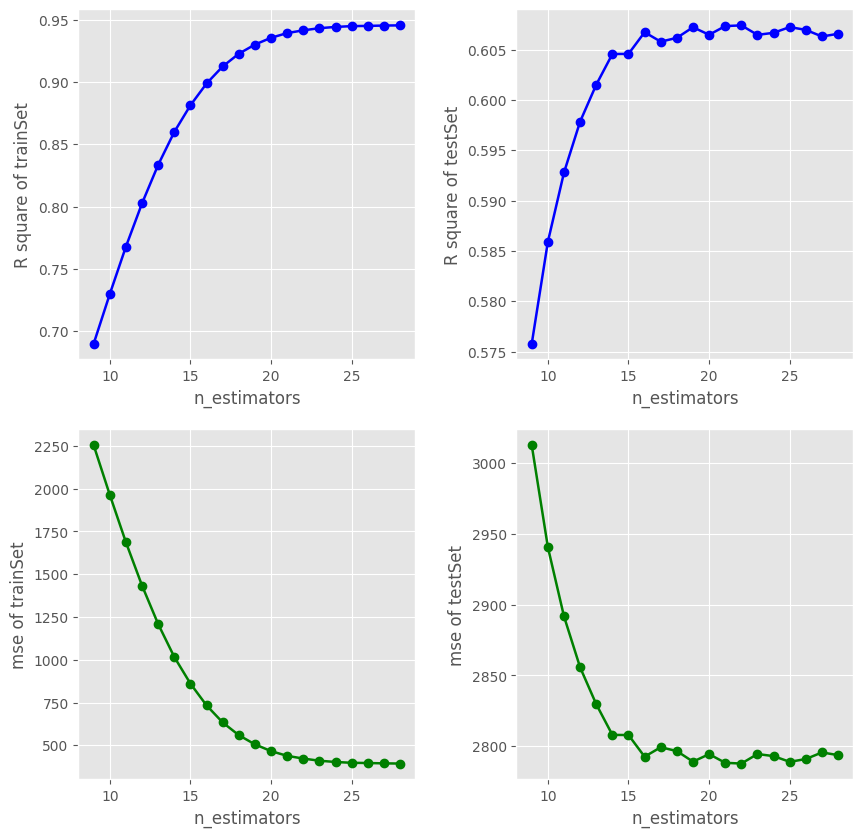

In [ ]:
import matplotlib.style as style
style.use('ggplot')
x=[i for i in range(9,29,1)]
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0][0].plot(x,train_score_list,'o-',linewidth=1.8 ,color='blue')
ax[0][0].set_xlabel(xlabel='n_estimators')
ax[0][0].set_ylabel(ylabel='R square of trainSet')

ax[0][1].plot(x,test_score_list,'o-',linewidth=1.8,color='blue')
ax[0][1].set_xlabel(xlabel='n_estimators')
ax[0][1].set_ylabel(ylabel='R square of testSet')

ax[1][0].plot(x,train_error_list,'o-',linewidth=1.8,color='green')
ax[1][0].set_xlabel(xlabel='n_estimators')
ax[1][0].set_ylabel(ylabel='mse of trainSet')

ax[1][1].plot(x,test_error_list,'o-',linewidth=1.8,color='green')
ax[1][1].set_xlabel(xlabel='n_estimators')
ax[1][1].set_ylabel(ylabel='mse of testSet')
plt.subplots_adjust(wspace=0.3,hspace=0.2)
print(f"The min testSet error is {min(test_error_list)} when max_depth = {x[np.argmin(test_error_list)]}")


# Regulation

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, LassoCV

# Ridge Regression
alphas = np.logspace(-6, 6, 13)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)


# Lasso Regression with Cross-Validation
lassocv = LassoCV(alphas=alphas, cv=5)
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)


# ElasticNet Regression with Cross-Validation
elasticnetcv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5) # l1_ratio determines the mix of L1 and L2 penalties
elasticnetcv.fit(X_train, y_train)
y_pred = elasticnetcv.predict(X_test)
elasticnet_mse = mean_squared_error(y_test, y_pred)
elasticnet_r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression - Mean Squared Error: {ridge_mse}, R² Score: {ridge_r2}")
print(f"Lasso Regression - Mean Squared Error: {lasso_mse}, R² Score: {lasso_r2}")
print(f"ElasticNet Regression - Mean Squared Error: {elasticnet_mse}, R² Score: {elasticnet_r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77104.00881752372, tolerance: 9672.681463136088
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78500.15355841815, tolerance: 9672.681463136088
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78418.06649496406, tolerance: 9672.681463136088
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWar

Ridge Regression - Mean Squared Error: 3979.02943849604, R² Score: 0.42862688044697894
Lasso Regression - Mean Squared Error: 3977.1514769710147, R² Score: 0.428896548402831
ElasticNet Regression - Mean Squared Error: 3979.0538159242474, R² Score: 0.4286233799432966


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.995e+07, tolerance: 1.208e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import RidgeCV

# Define alpha values
alphas = np.logspace(-6, 6, 13)

# Ridge regression with cross-validation
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)

# Evaluate Ridge regression
y_pred_ridge = ridgecv.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {ridge_mse}, R²: {ridge_r2}")


Ridge Regression - MSE: 3979.02943849604, R²: 0.42862688044697894


# Cross-validation